In [ ]:
!pip install descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install geopandas
!pip install geoplot
!pip install pysal

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 48.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 45.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 84.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102755 sha256=088

In [ ]:
import geoplot as gplt
import geopandas as gpd
import geoplot.crs as gcrs
import imageio
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import plotly
import plotly.express as px
import xlrd
import random
import seaborn as sns
import matplotlib.colors as colors 




from shapely.geometry import Point

%matplotlib inline

/usr/local/lib/python3.10/dist-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/geoplot/geoplot.py:9: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/m

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [1]:
#load US mape with states outlined
states = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/cb_2022_us_state_500k.shp")

states = gpd.read_file(states)

NameError: ignored

In [ ]:
type(states)

geopandas.geodataframe.GeoDataFrame

In [ ]:
states.head()

STATEFP   STATENS     AFFGEOID GEOID STUSPS          NAME LSAD  \
0      35  00897535  0400000US35    35     NM    New Mexico   00   
1      46  01785534  0400000US46    46     SD  South Dakota   00   
2      06  01779778  0400000US06    06     CA    California   00   
3      21  01779786  0400000US21    21     KY      Kentucky   00   
4      01  01779775  0400000US01    01     AL       Alabama   00   

          ALAND       AWATER  \
0  314198573403    726463825   
1  196341552329   3387681983   
2  403673617862  20291712025   
3  102266581101   2384240769   
4  131185042550   4582333181   

                                            geometry  
0  POLYGON ((-109.05017 31.48000, -109.04984 31.4...  
1  POLYGON ((-104.05788 44.99761, -104.05078 44.9...  
2  MULTIPOLYGON (((-118.60442 33.47855, -118.5987...  
3  MULTIPOLYGON (((-89.40565 36.52817, -89.39869 ...  
4  MULTIPOLYGON (((-88.05338 30.50699, -88.05109 ...

In [ ]:
states["NAME"].value_counts()

New Mexico                                      1
South Dakota                                    1
Montana                                         1
Arizona                                         1
Nebraska                                        1
Washington                                      1
Puerto Rico                                     1
Texas                                           1
Ohio                                            1
Wisconsin                                       1
Oregon                                          1
Mississippi                                     1
North Carolina                                  1
Virginia                                        1
West Virginia                                   1
Louisiana                                       1
Michigan                                        1
Massachusetts                                   1
Florida                                         1
United States Virgin Islands                    1


In [ ]:
#drop states and territories with none of the defined water contaiminants above the EPA limit
states.drop(states[states['NAME'] == 'Puerto Rico'].index, inplace = True)
states.drop(states[states['NAME'] == 'United States Virgin Islands'].index, inplace = True)
states.drop(states[states['NAME'] == 'Guam'].index, inplace = True)
states.drop(states[states['NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace = True)
states.drop(states[states['NAME'] == 'American Samoa'].index, inplace = True)
states.drop(states[states['NAME'] == 'Alaska'].index, inplace = True)

In [ ]:
states['NAME'].value_counts()

New Mexico              1
North Carolina          1
Connecticut             1
Montana                 1
Arizona                 1
Nebraska                1
Washington              1
Texas                   1
Ohio                    1
Wisconsin               1
Oregon                  1
Mississippi             1
Virginia                1
South Dakota            1
West Virginia           1
Louisiana               1
Michigan                1
Massachusetts           1
Florida                 1
New Jersey              1
North Dakota            1
Maryland                1
Maine                   1
Hawaii                  1
District of Columbia    1
Delaware                1
New Hampshire           1
South Carolina          1
California              1
Kentucky                1
Alabama                 1
Georgia                 1
Arkansas                1
Pennsylvania            1
Missouri                1
Colorado                1
Utah                    1
Oklahoma                1
Tennessee   

In [ ]:
states["STUSPS"].info()

<class 'pandas.core.series.Series'>
Int64Index: 50 entries, 0 to 55
Series name: STUSPS
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 800.0+ bytes


In [ ]:
#download map of US with county boundaries
county = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/cb_2022_us_county_500k.shp")

county = gpd.read_file(county)

In [ ]:
type(county)

geopandas.geodataframe.GeoDataFrame

In [ ]:
county.head()

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID     NAME        NAMELSAD  \
0      01      069  00161560  0500000US01069  01069  Houston  Houston County   
1      01      023  00161537  0500000US01023  01023  Choctaw  Choctaw County   
2      01      005  00161528  0500000US01005  01005  Barbour  Barbour County   
3      01      107  00161580  0500000US01107  01107  Pickens  Pickens County   
4      01      033  00161542  0500000US01033  01033  Colbert  Colbert County   

  STUSPS STATE_NAME LSAD       ALAND    AWATER  \
0     AL    Alabama   06  1501742235   4795415   
1     AL    Alabama   06  2365900083  19114321   
2     AL    Alabama   06  2292160151  50523213   
3     AL    Alabama   06  2282835044  22621093   
4     AL    Alabama   06  1535742270  79160396   

                                            geometry  
0  POLYGON ((-85.71209 31.19727, -85.70934 31.198...  
1  POLYGON ((-88.47323 31.89386, -88.46888 31.930...  
2  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
3  POLYGON ((-88.34043 32.99120, -88.33101 33.072...  
4  POLYGON ((-88.13925 34.58779, -88.13872 34.589...

In [ ]:
county['STATE_NAME'].value_counts()

Texas                                           254
Georgia                                         159
Virginia                                        133
Kentucky                                        120
Missouri                                        115
Kansas                                          105
Illinois                                        102
North Carolina                                  100
Iowa                                             99
Tennessee                                        95
Nebraska                                         93
Indiana                                          92
Ohio                                             88
Minnesota                                        87
Michigan                                         83
Mississippi                                      82
Puerto Rico                                      78
Oklahoma                                         77
Arkansas                                         75
Wisconsin   

In [ ]:
county.drop(county[county['STATE_NAME'] == 'Puerto Rico'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'United States Virgin Islands'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'Guam'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'Commonwealth of the Northern Mariana Islands'].index, inplace = True)
county.drop(county[county['STATE_NAME'] == 'American Samoa'].index, inplace = True)


In [ ]:
county["STATE_NAME"].value_counts()

Texas                   254
Georgia                 159
Virginia                133
Kentucky                120
Missouri                115
Kansas                  105
Illinois                102
North Carolina          100
Iowa                     99
Tennessee                95
Nebraska                 93
Indiana                  92
Ohio                     88
Minnesota                87
Michigan                 83
Mississippi              82
Oklahoma                 77
Arkansas                 75
Wisconsin                72
Pennsylvania             67
Alabama                  67
Florida                  67
South Dakota             66
Colorado                 64
Louisiana                64
New York                 62
California               58
Montana                  56
West Virginia            55
North Dakota             53
South Carolina           46
Idaho                    44
Washington               39
Oregon                   36
New Mexico               33
Alaska              

In [ ]:
#load water contaminants dataset; all of US testing in 2022
water = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/watercontaminantsgeo.csv")

water = pd.read_csv(water)

<ipython-input-11-d6ffeab381d0>:4: DtypeWarning: Columns (12,13,15,19,21,24,27,28,34,38,41,43,45,47,59,61,62,73,74,76,79) have mixed types. Specify dtype option on import or set low_memory=False.
  water = pd.read_csv(water)


In [ ]:
water.info()
water.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460232 entries, 0 to 460231
Data columns (total 81 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   OrganizationIdentifier                             460232 non-null  object 
 1   OrganizationFormalName                             460232 non-null  object 
 2   ActivityIdentifier                                 460232 non-null  object 
 3   ActivityTypeCode                                   460232 non-null  object 
 4   ActivityMediaName                                  460232 non-null  object 
 5   ActivityMediaSubdivisionName                       258372 non-null  object 
 6   ActivityStartDate                                  460232 non-null  object 
 7   ActivityStartTime/Time                             455133 non-null  object 
 8   ActivityStartTime/TimeZoneCode                     455133 non-null  object

(460232, 81)

In [ ]:
water.head()

OrganizationIdentifier          OrganizationFormalName  ActivityIdentifier  \
0                USGS-UT  USGS Utah Water Science Center  nwisut.01.02200555   
1                USGS-UT  USGS Utah Water Science Center  nwisut.01.02200555   
2                USGS-UT  USGS Utah Water Science Center  nwisut.01.02200555   
3                USGS-UT  USGS Utah Water Science Center  nwisut.01.02200555   
4                USGS-UT  USGS Utah Water Science Center  nwisut.01.02200555   

  ActivityTypeCode ActivityMediaName ActivityMediaSubdivisionName  \
0   Sample-Routine             Water                Surface Water   
1   Sample-Routine             Water                Surface Water   
2   Sample-Routine             Water                Surface Water   
3   Sample-Routine             Water                Surface Water   
4   Sample-Routine             Water                Surface Water   

  ActivityStartDate ActivityStartTime/Time ActivityStartTime/TimeZoneCode  \
0        2022-02-23               14:15:00                            MST   
1        2022-02-23               14:15:00                            MST   
2        2022-02-23               14:15:00                            MST   
3        2022-02-23               14:15:00                            MST   
4        2022-02-23               14:15:00                            MST   

  ActivityEndDate  ...                               LaboratoryName  \
0             NaN  ...  USGS-National Water Quality Lab, Denver, CO   
1             NaN  ...  USGS-National Water Quality Lab, Denver, CO   
2             NaN  ...  USGS-National Water Quality Lab, Denver, CO   
3             NaN  ...  USGS-National Water Quality Lab, Denver, CO   
4             NaN  ...  USGS-National Water Quality Lab, Denver, CO   

  AnalysisStartDate                        ResultLaboratoryCommentText  \
0        2022-03-10                                                NaN   
1        2022-03-10                                                NaN   
2        2022-03-10  below the reporting level but at or above the ...   
3        2022-03-10                                                NaN   
4        2022-03-10  below the reporting level but at or above the ...   

  ResultDetectionQuantitationLimitUrl  DetectionQuantitationLimitTypeName  \
0                                 NaN  Blank-adjusted method detect limit   
1                                 NaN  Blank-adjusted method detect limit   
2                                 NaN  Blank-adjusted method detect limit   
3                                 NaN  Blank-adjusted method detect limit   
4                                 NaN  Blank-adjusted method detect limit   

  DetectionQuantitationLimitMeasure/MeasureValue  \
0                                            0.1   
1                                            0.1   
2                                           0.01   
3                                            5.0   
4                                           0.03   

   DetectionQuantitationLimitMeasure/MeasureUnitCode LabSamplePreparationUrl  \
0                                               ug/l                     NaN   
1                                               ug/l                     NaN   
2                                               ug/l                     NaN   
3                                               ug/l                     NaN   
4                                               ug/l                     NaN   

   LastUpdated ProviderName  
0          NaN         NWIS  
1          NaN         NWIS  
2          NaN         NWIS  
3          NaN         NWIS  
4          NaN         NWIS  

[5 rows x 81 columns]

In [ ]:
#We are interested in Activity Location and test results, especially for Cadmium, Lead, Mercury, and Arsenic
water_2 = water[['ActivityLocation/LatitudeMeasure', 'ActivityLocation/LongitudeMeasure', 'CharacteristicName', 'ResultMeasureValue', 'ResultMeasure/MeasureUnitCode']]
water_2.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
0                               NaN                                NaN   
1                               NaN                                NaN   
2                               NaN                                NaN   
3                               NaN                                NaN   
4                               NaN                                NaN   

  CharacteristicName ResultMeasureValue ResultMeasure/MeasureUnitCode  
0            Arsenic               14.6                          ug/l  
1             Barium               42.4                          ug/l  
2          Beryllium              0.019                          ug/l  
3              Boron              143.0                          ug/l  
4            Cadmium              0.038                          ug/l

In [ ]:
water_2.info()
water_2.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460232 entries, 0 to 460231
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ActivityLocation/LatitudeMeasure   367909 non-null  float64
 1   ActivityLocation/LongitudeMeasure  367909 non-null  float64
 2   CharacteristicName                 460232 non-null  object 
 3   ResultMeasureValue                 304056 non-null  object 
 4   ResultMeasure/MeasureUnitCode      368335 non-null  object 
dtypes: float64(2), object(3)
memory usage: 17.6+ MB


(460232, 5)

In [ ]:
#Any rows with missing data are useless in this case, so I will drop all rows with nulls
water_2.dropna(inplace = True)
water_2.info()
water_2.shape

<ipython-input-16-06884cec8521>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_2.dropna(inplace = True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 247876 entries, 92324 to 460231
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ActivityLocation/LatitudeMeasure   247876 non-null  float64
 1   ActivityLocation/LongitudeMeasure  247876 non-null  float64
 2   CharacteristicName                 247876 non-null  object 
 3   ResultMeasureValue                 247876 non-null  object 
 4   ResultMeasure/MeasureUnitCode      247876 non-null  object 
dtypes: float64(2), object(3)
memory usage: 11.3+ MB


(247876, 5)

In [ ]:
#some objects are not purely numbers
(water_2['ResultMeasureValue'].str.contains('<')).sum()

3550

In [ ]:
#replace strings that contain less than, ND, _, or non-detect with 0, since these values are very low; replace comma with nothing
water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*<.*$)', '0')
water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*ND.*$)', '0')
water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*_.*$)', '0')
water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*Non-detect.*$)', '0')
water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(',', '')


<ipython-input-18-4121b9215c3d>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*<.*$)', '0')
<ipython-input-18-4121b9215c3d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*<.*$)', '0')
<ipython-input-18-4121b9215c3d>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  water_2['ResultMeasureValue'] = water_2.ResultMeasureValue.str.replace(r'(^.*ND.*$)', '0')
<ipython-input-18-4121b9215c3d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

In [ ]:
(water_2['ResultMeasureValue'].str.contains('<')).sum()

0

In [ ]:
#change ResultMeasureValue object type to float
water_2['ResultMeasureValue'] = water_2['ResultMeasureValue'].astype(float)
water_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247876 entries, 92324 to 460231
Data columns (total 5 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   ActivityLocation/LatitudeMeasure   247876 non-null  float64
 1   ActivityLocation/LongitudeMeasure  247876 non-null  float64
 2   CharacteristicName                 247876 non-null  object 
 3   ResultMeasureValue                 247876 non-null  float64
 4   ResultMeasure/MeasureUnitCode      247876 non-null  object 
dtypes: float64(3), object(2)
memory usage: 11.3+ MB


<ipython-input-20-a36755a25547>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  water_2['ResultMeasureValue'] = water_2['ResultMeasureValue'].astype(float)


In [ ]:
water_2['CharacteristicName'].value_counts()

Iron                            21338
Manganese                       19431
Copper                          19211
Aluminum                        18245
Arsenic                         17087
Zinc                            15564
Nickel                          14824
Lead                            14793
Chromium                        11349
Barium                          11129
Strontium                       10653
Cadmium                         10219
Selenium                         8717
Boron                            7269
Molybdenum                       6546
Thallium                         6188
Antimony                         6159
Beryllium                        6150
Vanadium                         5882
Silver                           5301
Tin                              4059
Mercury                          3168
Cobalt                           2305
Titanium                         1083
Lithium                           561
Ferrous ion                       186
Inorganic mo

In [ ]:
arsenic = water_2[(water_2["CharacteristicName"] == "Arsenic")]
arsenic.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92372                         26.287150                         -81.795782   
92387                         40.659150                        -111.501750   
92471                         42.122242                        -122.465131   
92473                         33.292167                        -109.195306   
92503                         26.409601                         -81.811374   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92372            Arsenic             1.22000                          ug/L  
92387            Arsenic             2.37000                          ug/L  
92471            Arsenic            36.70000                          ug/L  
92473            Arsenic             0.00077                          mg/L  
92503            Arsenic             0.83900                          ug/L

In [ ]:
arsenic['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L     14783
mg/L      1977
mg/kg      232
ug/g        75
ppb         10
ug/kg        5
ppm          3
None         2
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
#convert all data to ug/L
arsenic['ResultMeasureValue'] = np.where(arsenic['ResultMeasure/MeasureUnitCode'] == "mg/L",
                                         arsenic['ResultMeasureValue']*1000,
                                         arsenic['ResultMeasureValue'])
arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')

arsenic['ResultMeasureValue'] = np.where(arsenic['ResultMeasure/MeasureUnitCode'] == "mg/kg",
                                         arsenic['ResultMeasureValue']*1000,
                                         arsenic['ResultMeasureValue'])
arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('mg/kg', 'ug/L')

arsenic['ResultMeasureValue'] = np.where(arsenic['ResultMeasure/MeasureUnitCode'] == "ug/g",
                                         arsenic['ResultMeasureValue']*1000,
                                         arsenic['ResultMeasureValue'])
arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('ug/g', 'ug/L')

arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('ppb', 'ug/L')

arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('ug/kg', 'ug/L')

arsenic['ResultMeasureValue'] = np.where(arsenic['ResultMeasure/MeasureUnitCode'] == "ppm",
                                         arsenic['ResultMeasureValue']*1000,
                                         arsenic['ResultMeasureValue'])
arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('ppm', 'ug/L')

<ipython-input-24-3b6b4104fcb2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenic['ResultMeasureValue'] = np.where(arsenic['ResultMeasure/MeasureUnitCode'] == "mg/L",
<ipython-input-24-3b6b4104fcb2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arsenic['ResultMeasure/MeasureUnitCode'] = arsenic['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')
<ipython-input-24-3b6b4104fcb2>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
arsenic.head()


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92372                         26.287150                         -81.795782   
92387                         40.659150                        -111.501750   
92471                         42.122242                        -122.465131   
92473                         33.292167                        -109.195306   
92503                         26.409601                         -81.811374   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92372            Arsenic               1.220                          ug/L  
92387            Arsenic               2.370                          ug/L  
92471            Arsenic              36.700                          ug/L  
92473            Arsenic               0.770                          ug/L  
92503            Arsenic               0.839                          ug/L

In [ ]:
arsenic['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    17085
None        2
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
#Remove rows with 'None' for result measure unit code
arsenic = arsenic[arsenic["ResultMeasure/MeasureUnitCode"].str.contains("None") ==False]
arsenic['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    17085
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
lead = water_2[(water_2["CharacteristicName"] == "Lead")]
lead.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92355                         38.547228                         -75.243750   
92365                         28.463658                         -81.114335   
92366                         29.595278                         -81.679167   
92386                         27.308710                         -82.455362   
92404                         26.365087                         -81.807608   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92355               Lead            0.092000                          ug/L  
92365               Lead            0.183000                          ug/L  
92366               Lead            0.250231                          ug/L  
92386               Lead            0.200000                          ug/L  
92404               Lead            0.500000                          ug/L

In [ ]:
lead['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L     12148
mg/L      2298
mg/kg      251
ug/g        96
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
#convert all data to ug/L
lead['ResultMeasureValue'] = np.where(lead['ResultMeasure/MeasureUnitCode'] == "mg/L",
                                         lead['ResultMeasureValue']*1000,
                                         lead['ResultMeasureValue'])
lead['ResultMeasure/MeasureUnitCode'] = lead['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')

lead['ResultMeasureValue'] = np.where(lead['ResultMeasure/MeasureUnitCode'] == "mg/kg",
                                         lead['ResultMeasureValue']*1000,
                                         lead['ResultMeasureValue'])
lead['ResultMeasure/MeasureUnitCode'] = lead['ResultMeasure/MeasureUnitCode'].str.replace('mg/kg', 'ug/L')

lead['ResultMeasureValue'] = np.where(lead['ResultMeasure/MeasureUnitCode'] == "ug/g",
                                         lead['ResultMeasureValue']*1000,
                                         lead['ResultMeasureValue'])
lead['ResultMeasure/MeasureUnitCode'] = lead['ResultMeasure/MeasureUnitCode'].str.replace('ug/g', 'ug/L')

<ipython-input-30-d221fd3e9310>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead['ResultMeasureValue'] = np.where(lead['ResultMeasure/MeasureUnitCode'] == "mg/L",
<ipython-input-30-d221fd3e9310>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead['ResultMeasure/MeasureUnitCode'] = lead['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')
<ipython-input-30-d221fd3e9310>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [ ]:
lead['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    14793
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
cadmium = water_2[(water_2["CharacteristicName"] == "Cadmium")]
cadmium.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92330                         40.767170                         -74.122870   
92335                         33.494019                         -79.961116   
92419                         29.664722                         -81.218056   
92443                         30.956450                         -87.276070   
92446                         29.866189                         -81.305908   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92330            Cadmium              1.0000                          ug/L  
92335            Cadmium              0.0001                          mg/L  
92419            Cadmium              0.5000                          ug/L  
92443            Cadmium              0.0200                          ug/L  
92446            Cadmium              0.5000                          ug/L

In [ ]:
cadmium['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L     8015
mg/L     1910
mg/kg     245
ug/g       46
ppm         3
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
#convert all results to ug/L
cadmium['ResultMeasureValue'] = np.where(cadmium['ResultMeasure/MeasureUnitCode'] == "mg/L",
                                         cadmium['ResultMeasureValue']*1000,
                                         cadmium['ResultMeasureValue'])
cadmium['ResultMeasure/MeasureUnitCode'] = cadmium['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')

cadmium['ResultMeasureValue'] = np.where(cadmium['ResultMeasure/MeasureUnitCode'] == "mg/kg",
                                         cadmium['ResultMeasureValue']*1000,
                                         cadmium['ResultMeasureValue'])
cadmium['ResultMeasure/MeasureUnitCode'] = cadmium['ResultMeasure/MeasureUnitCode'].str.replace('mg/kg', 'ug/L')

cadmium['ResultMeasureValue'] = np.where(cadmium['ResultMeasure/MeasureUnitCode'] == "ug/g",
                                         cadmium['ResultMeasureValue']*1000,
                                         cadmium['ResultMeasureValue'])
cadmium['ResultMeasure/MeasureUnitCode'] = cadmium['ResultMeasure/MeasureUnitCode'].str.replace('ug/g', 'ug/L')

cadmium['ResultMeasureValue'] = np.where(cadmium['ResultMeasure/MeasureUnitCode'] == "ppm",
                                         cadmium['ResultMeasureValue']*1000,
                                         cadmium['ResultMeasureValue'])
cadmium['ResultMeasure/MeasureUnitCode'] = cadmium['ResultMeasure/MeasureUnitCode'].str.replace('ppm', 'ug/L')

<ipython-input-35-83866cec06f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadmium['ResultMeasureValue'] = np.where(cadmium['ResultMeasure/MeasureUnitCode'] == "mg/L",
<ipython-input-35-83866cec06f5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadmium['ResultMeasure/MeasureUnitCode'] = cadmium['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')
<ipython-input-35-83866cec06f5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
cadmium['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    10219
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
mercury = water_2[(water_2["CharacteristicName"] == "Mercury")]
mercury.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92388                         38.775000                         -77.246100   
92462                         34.183927                         -81.726093   
92506                         34.387377                         -80.068956   
92638                         37.054800                         -80.339800   
92725                         34.331881                         -82.575844   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92388            Mercury              0.3000                          ng/L  
92462            Mercury              0.1800                         mg/kg  
92506            Mercury              0.4500                         mg/kg  
92638            Mercury              0.4000                          ng/L  
92725            Mercury              0.0002                          mg/L

In [ ]:
mercury['ResultMeasure/MeasureUnitCode'].value_counts()

mg/L     1511
ug/L      825
mg/kg     457
ng/L      319
ug/g       56
Name: ResultMeasure/MeasureUnitCode, dtype: int64

In [ ]:
#convert all results to ug/L
mercury['ResultMeasureValue'] = np.where(mercury['ResultMeasure/MeasureUnitCode'] == "mg/L",
                                         mercury['ResultMeasureValue']*1000,
                                         mercury['ResultMeasureValue'])
mercury['ResultMeasure/MeasureUnitCode'] = mercury['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')

mercury['ResultMeasureValue'] = np.where(mercury['ResultMeasure/MeasureUnitCode'] == "mg/kg",
                                         mercury['ResultMeasureValue']*1000,
                                         mercury['ResultMeasureValue'])
mercury['ResultMeasure/MeasureUnitCode'] = mercury['ResultMeasure/MeasureUnitCode'].str.replace('mg/kg', 'ug/L')

mercury['ResultMeasureValue'] = np.where(mercury['ResultMeasure/MeasureUnitCode'] == "ng/L",
                                         mercury['ResultMeasureValue']/1000,
                                         mercury['ResultMeasureValue'])
mercury['ResultMeasure/MeasureUnitCode'] = mercury['ResultMeasure/MeasureUnitCode'].str.replace('ng/L', 'ug/L')

mercury['ResultMeasureValue'] = np.where(mercury['ResultMeasure/MeasureUnitCode'] == "ug/g",
                                         mercury['ResultMeasureValue']*1000,
                                         mercury['ResultMeasureValue'])
mercury['ResultMeasure/MeasureUnitCode'] = mercury['ResultMeasure/MeasureUnitCode'].str.replace('ug/g', 'ug/L')

<ipython-input-39-fb46c3b3ec65>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercury['ResultMeasureValue'] = np.where(mercury['ResultMeasure/MeasureUnitCode'] == "mg/L",
<ipython-input-39-fb46c3b3ec65>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercury['ResultMeasure/MeasureUnitCode'] = mercury['ResultMeasure/MeasureUnitCode'].str.replace('mg/L', 'ug/L')
<ipython-input-39-fb46c3b3ec65>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [ ]:
mercury.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92388                         38.775000                         -77.246100   
92462                         34.183927                         -81.726093   
92506                         34.387377                         -80.068956   
92638                         37.054800                         -80.339800   
92725                         34.331881                         -82.575844   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  
92388            Mercury              0.0003                          ug/L  
92462            Mercury            180.0000                          ug/L  
92506            Mercury            450.0000                          ug/L  
92638            Mercury              0.0004                          ug/L  
92725            Mercury              0.2000                          ug/L

In [ ]:
mercury['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    3168
Name: ResultMeasure/MeasureUnitCode, dtype: int64

EPA Drinking Water Regulations: https://www.epa.gov/ground-water-and-drinking-water/national-primary-drinking-water-regulations

Text(0.5, 1.0, 'Arsenic Distribution of Dataset')

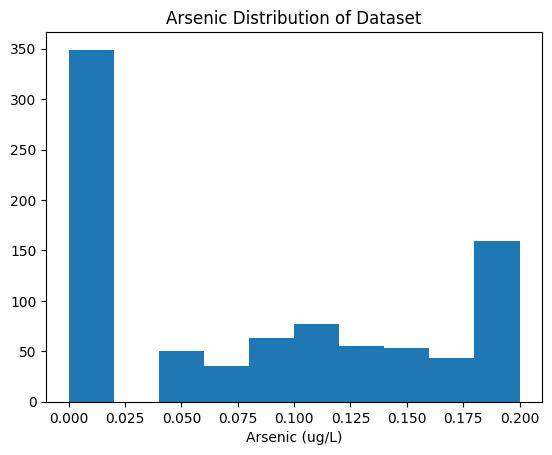

In [ ]:
#distribution for each dataset
#arsenic['ResultMeasureValue'].plot(kind='hist')
plt.hist(arsenic['ResultMeasureValue'], range=[0, 0.2])
plt.xlabel('Arsenic (ug/L)')
plt.title("Arsenic Distribution of Dataset")

#safety standard for arsenic in drinking water is 10 ug/L

<ipython-input-43-0fdb1291c798>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(arsenic['ResultMeasureValue'])


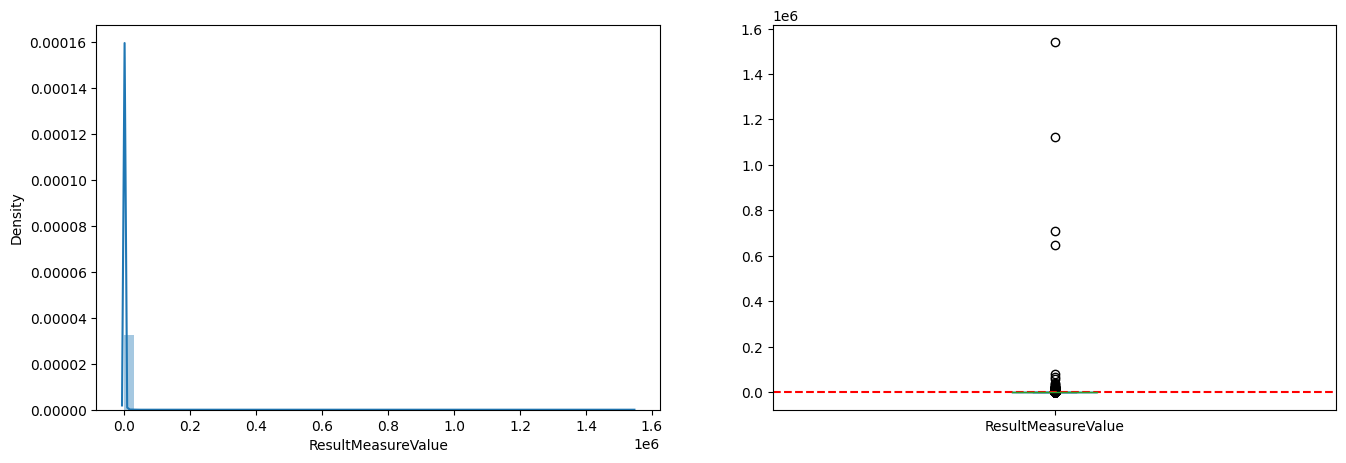

In [ ]:
import seaborn as sns
plt.subplot(121), sns.distplot(arsenic['ResultMeasureValue'])
plt.subplot(122), arsenic['ResultMeasureValue'].plot.box(figsize=(16,5))
reference = [10]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Text(0.5, 1.0, 'Lead Distribution of Dataset')

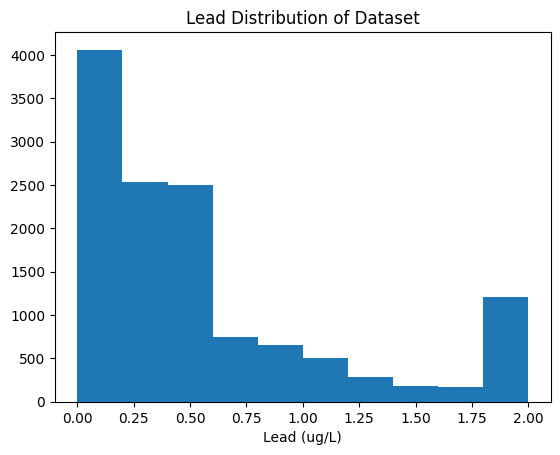

In [ ]:
plt.hist(lead['ResultMeasureValue'], range=[0, 2])
plt.xlabel('Lead (ug/L)')
plt.title("Lead Distribution of Dataset")

#some outliers not visible in histogram
#safe level of lead in drinking water is 15 ug/L

<ipython-input-45-601d1c1b90c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(lead['ResultMeasureValue'])


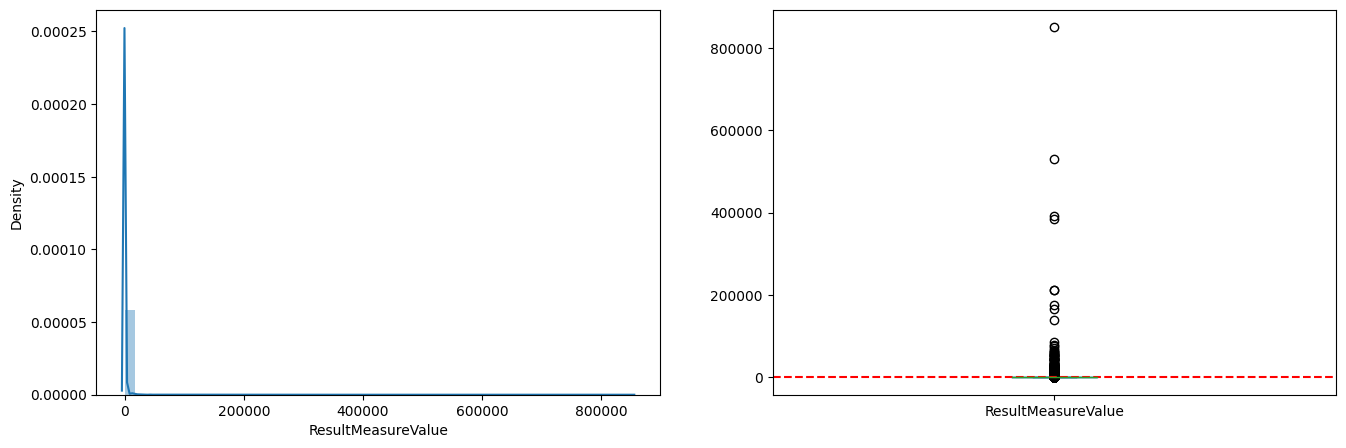

In [ ]:
plt.subplot(121), sns.distplot(lead['ResultMeasureValue'])
plt.subplot(122), lead['ResultMeasureValue'].plot.box(figsize=(16,5))
reference = [15]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Text(0.5, 1.0, 'Cadmium Distribution of Dataset')

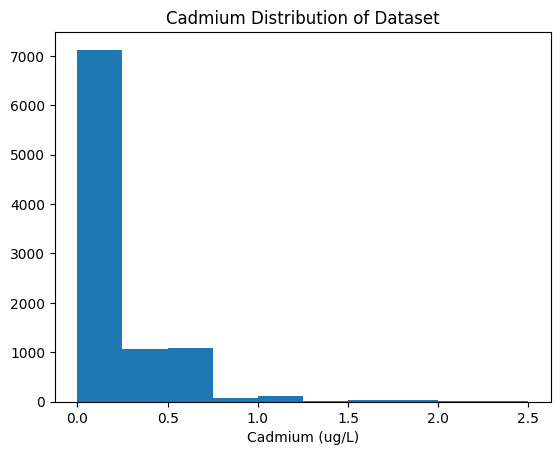

In [ ]:
plt.hist(cadmium['ResultMeasureValue'], range=[0, 2.5])
plt.xlabel('Cadmium (ug/L)')
plt.title("Cadmium Distribution of Dataset")

#some outliers not visible in histogram
#safe level of cadmium in drinking water is 5 ug/L

<ipython-input-47-562626872619>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(cadmium['ResultMeasureValue'])


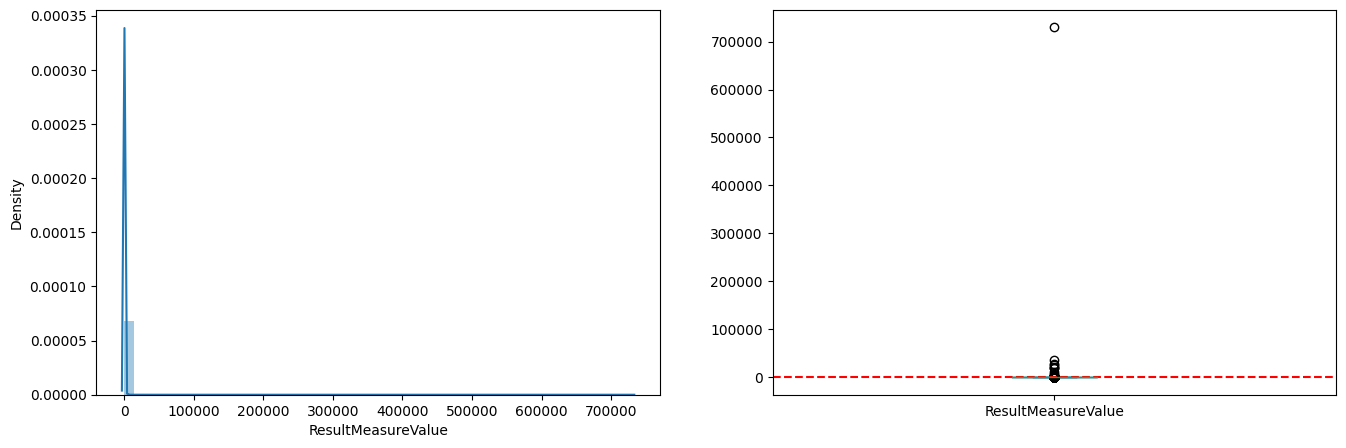

In [ ]:
plt.subplot(121), sns.distplot(cadmium['ResultMeasureValue'])
plt.subplot(122), cadmium['ResultMeasureValue'].plot.box(figsize=(16,5))
reference = [5]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

Text(0.5, 1.0, 'Mercury Distribution of Dataset')

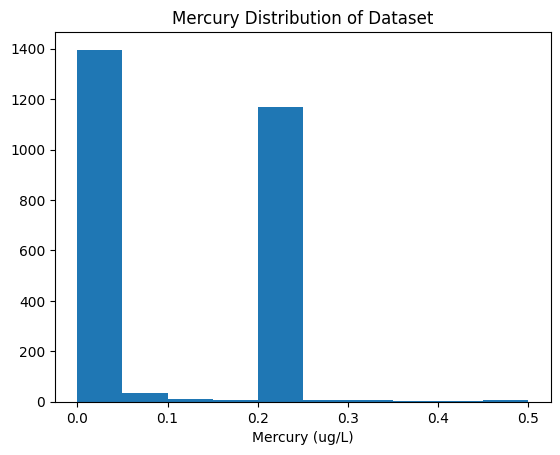

In [ ]:
plt.hist(mercury['ResultMeasureValue'], range=[0, 0.5])
plt.xlabel('Mercury (ug/L)')
plt.title("Mercury Distribution of Dataset")
#some outliers not visible in the histogram
#safe level of mercury in drinking water is 2 ug/L

<ipython-input-49-a68395adeef0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(mercury['ResultMeasureValue'])


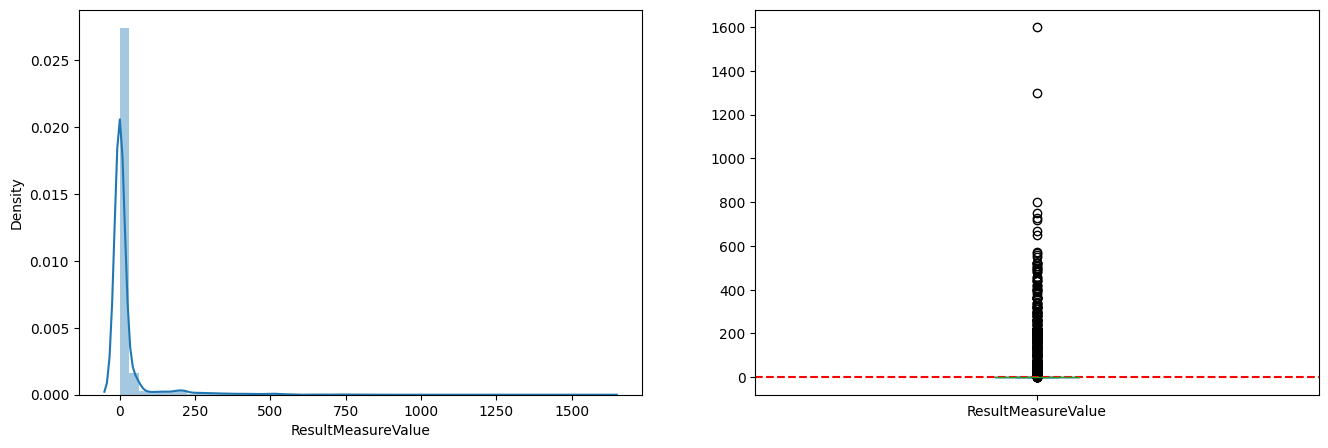

In [ ]:
plt.subplot(121), sns.distplot(mercury['ResultMeasureValue'])
plt.subplot(122), mercury['ResultMeasureValue'].plot.box(figsize=(16,5))
reference = [2]
left, right = plt.xlim()
plt.hlines(reference, xmin=left, xmax=right, color='r', linestyles='--')
plt.show()

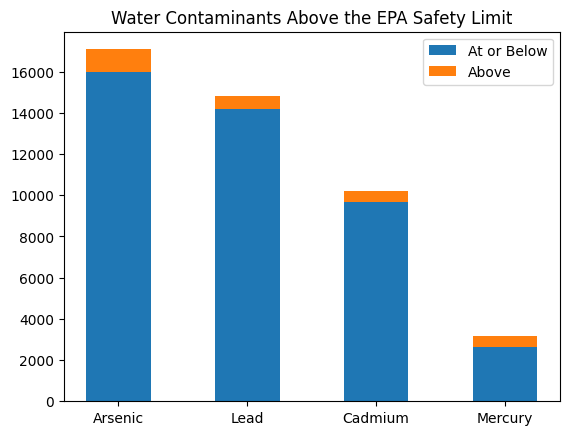

In [ ]:
species = (
    "Arsenic",
    "Lead",
    "Cadmium",
    "Mercury",
)
weight_counts = {
    "At or Below": np.array([15972, 14207, 9673, 2655]),
    "Above": np.array([1113, 586, 546, 513]),
}
width = 0.5

fig, ax = plt.subplots()
bottom = np.zeros(4)

for boolean, weight_count in weight_counts.items():
    p = ax.bar(species, weight_count, width, label=boolean, bottom=bottom)
    bottom += weight_count

ax.set_title("Water Contaminants Above the EPA Safety Limit")
ax.legend(loc="upper right")

plt.show()

In [ ]:
#Show on Map locations where these chemicals are above the EPA regulation limit

In [ ]:
#zip coordinates into latitude and longitude together
arsenic["Coordinates"] = list(zip(arsenic['ActivityLocation/LongitudeMeasure'], arsenic['ActivityLocation/LatitudeMeasure']))
arsenic.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92372                         26.287150                         -81.795782   
92387                         40.659150                        -111.501750   
92471                         42.122242                        -122.465131   
92473                         33.292167                        -109.195306   
92503                         26.409601                         -81.811374   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92372            Arsenic               1.220                          ug/L   
92387            Arsenic               2.370                          ug/L   
92471            Arsenic              36.700                          ug/L   
92473            Arsenic               0.770                          ug/L   
92503            Arsenic               0.839                          ug/L   

                         Coordinates  
92372  (-81.795782294, 26.287149725)  
92387         (-111.50175, 40.65915)  
92471       (-122.465131, 42.122242)  
92473       (-109.195306, 33.292167)  
92503        (-81.811374, 26.409601)

In [ ]:
#turn coordinates tuple into shapely point object
arsenic["Coordinates"] = arsenic["Coordinates"].apply(Point)
arsenic.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92372                         26.287150                         -81.795782   
92387                         40.659150                        -111.501750   
92471                         42.122242                        -122.465131   
92473                         33.292167                        -109.195306   
92503                         26.409601                         -81.811374   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92372            Arsenic               1.220                          ug/L   
92387            Arsenic               2.370                          ug/L   
92471            Arsenic              36.700                          ug/L   
92473            Arsenic               0.770                          ug/L   
92503            Arsenic               0.839                          ug/L   

                              Coordinates  
92372  POINT (-81.795782294 26.287149725)  
92387         POINT (-111.50175 40.65915)  
92471       POINT (-122.465131 42.122242)  
92473       POINT (-109.195306 33.292167)  
92503        POINT (-81.811374 26.409601)

In [ ]:
#convert dataframe into geodata frame
adf = gpd.GeoDataFrame(arsenic, geometry="Coordinates")
adf.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92372                         26.287150                         -81.795782   
92387                         40.659150                        -111.501750   
92471                         42.122242                        -122.465131   
92473                         33.292167                        -109.195306   
92503                         26.409601                         -81.811374   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92372            Arsenic               1.220                          ug/L   
92387            Arsenic               2.370                          ug/L   
92471            Arsenic              36.700                          ug/L   
92473            Arsenic               0.770                          ug/L   
92503            Arsenic               0.839                          ug/L   

                       Coordinates  
92372   POINT (-81.79578 26.28715)  
92387  POINT (-111.50175 40.65915)  
92471  POINT (-122.46513 42.12224)  
92473  POINT (-109.19531 33.29217)  
92503   POINT (-81.81137 26.40960)

In [ ]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world = world.set_index("iso_a3")

world.head()

pop_est      continent                      name  gdp_md_est  \
iso_a3                                                                     
FJI        889953.0        Oceania                      Fiji        5496   
TZA      58005463.0         Africa                  Tanzania       63177   
ESH        603253.0         Africa                 W. Sahara         907   
CAN      37589262.0  North America                    Canada     1736425   
USA     328239523.0  North America  United States of America    21433226   

                                                 geometry  
iso_a3                                                     
FJI     MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
TZA     POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
ESH     POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
CAN     MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
USA     MULTIPOLYGON (((-122.84000 49.00000, -120.0000...

In [ ]:
world.geometry.name

'geometry'

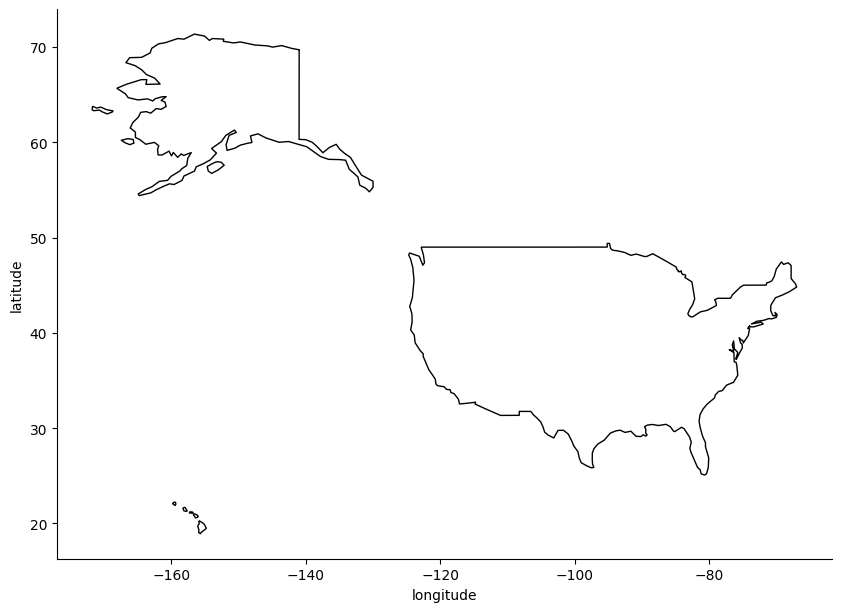

In [ ]:
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot SA.
world.query("name == 'United States of America'").plot(ax=gax, edgecolor='black',color='white')

# By the way, if you haven't read the book 'longitude' by Dava Sobel, you should...
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#drop entries with longitude greater than -50 and drop rows with arsenic less than 10 ug/L
i = adf[((adf['ActivityLocation/LongitudeMeasure'] > -50))].index
j = adf[((adf["ResultMeasureValue"] <= 10))].index

In [ ]:
adf = adf.drop(i)
adf = adf.drop(j)

In [ ]:
adf['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    1113
Name: ResultMeasure/MeasureUnitCode, dtype: int64

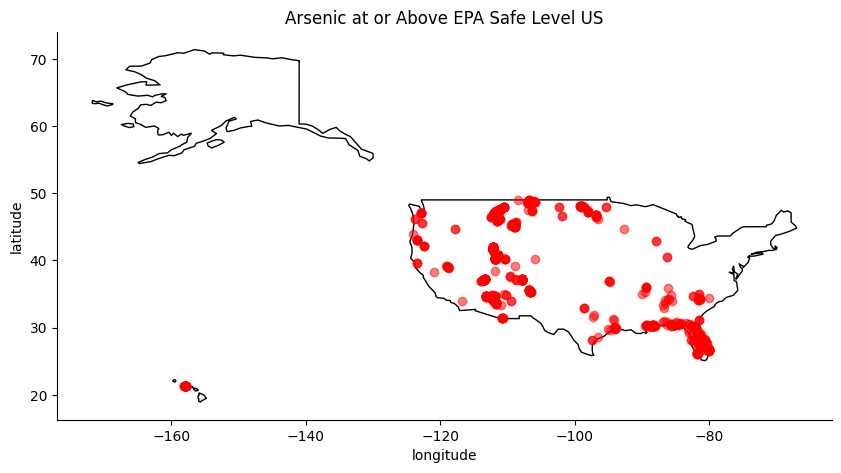

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
adf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Arsenic at or Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
states.crs = "EPSG: 4326"

In [ ]:

states = states.to_crs("EPSG: 4326")

<Axes: >

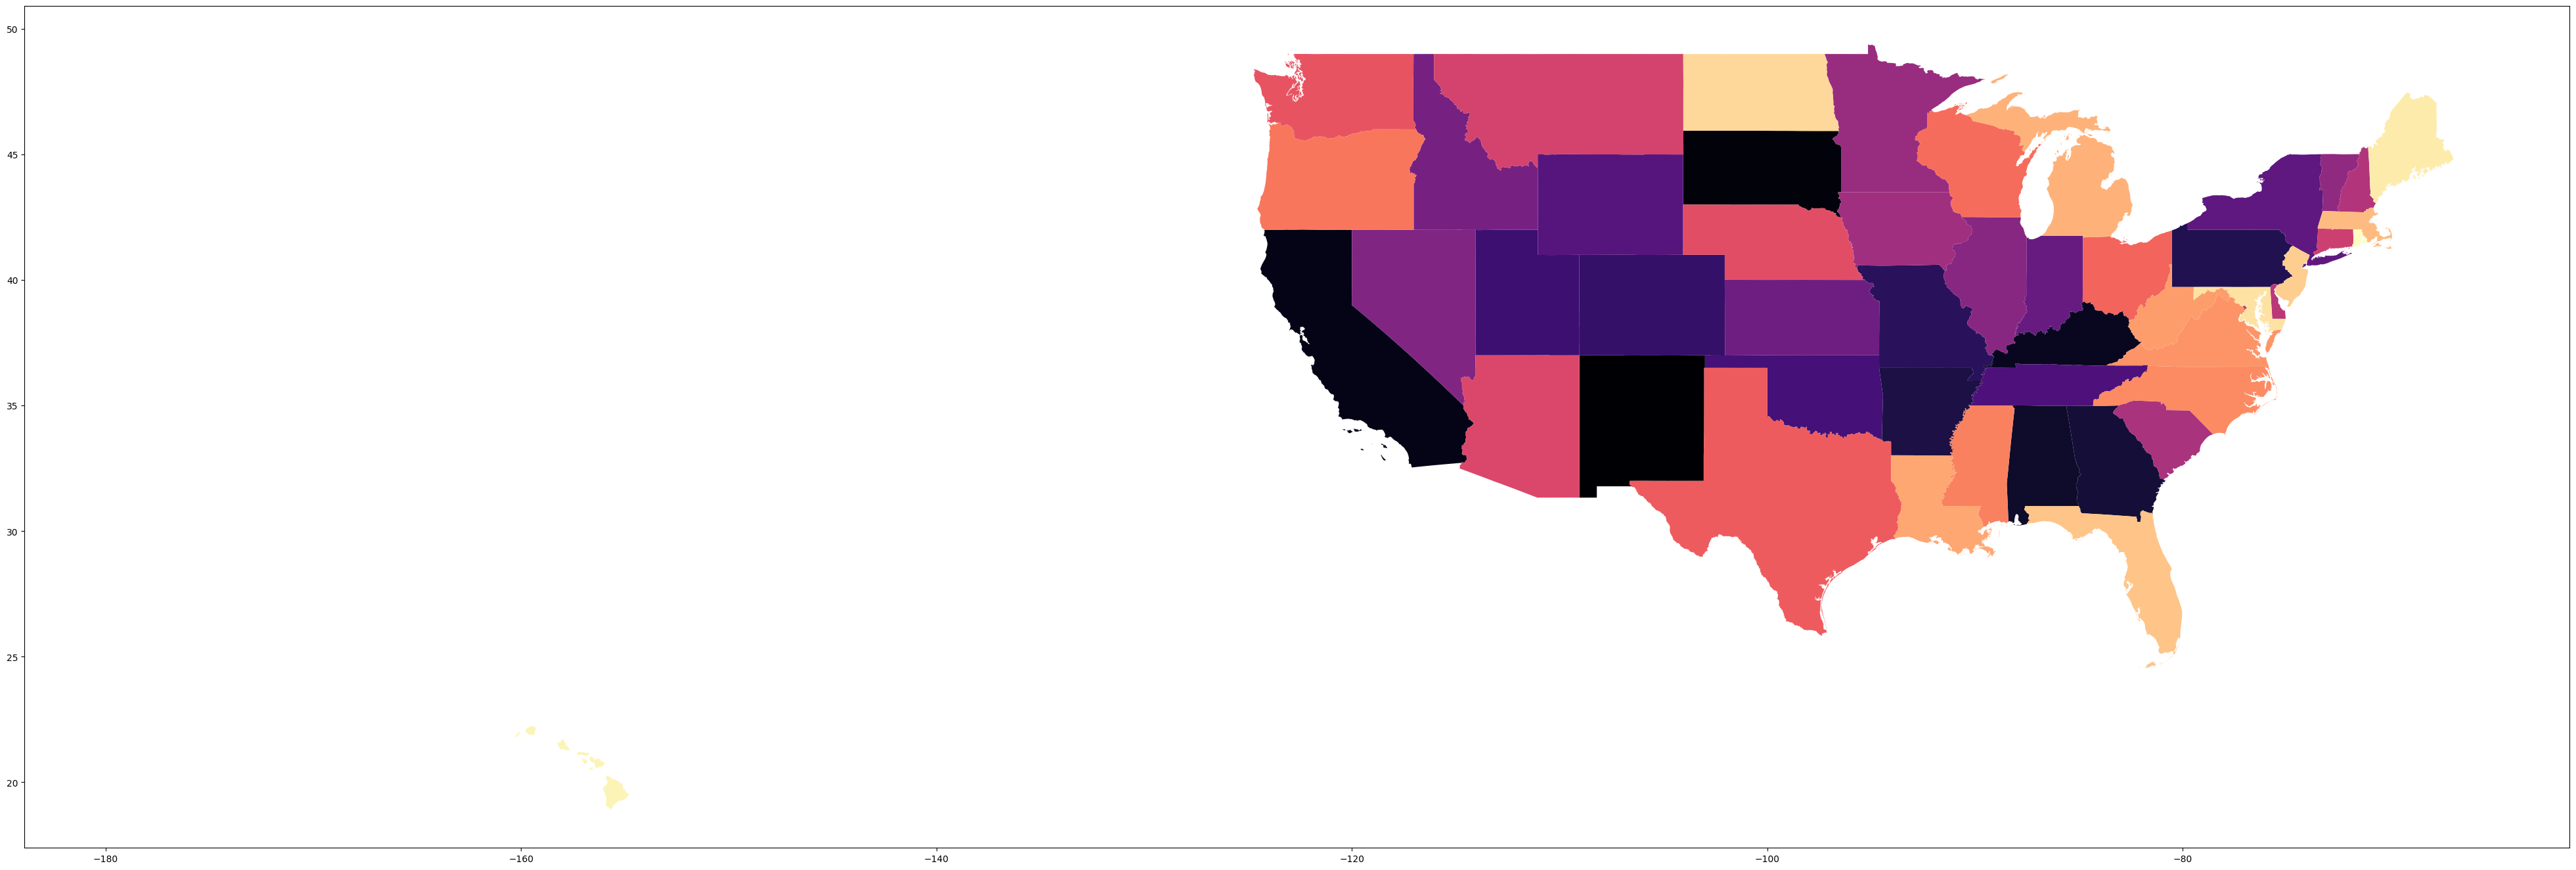

In [ ]:
states.plot(cmap = 'magma', figsize=(50,50))

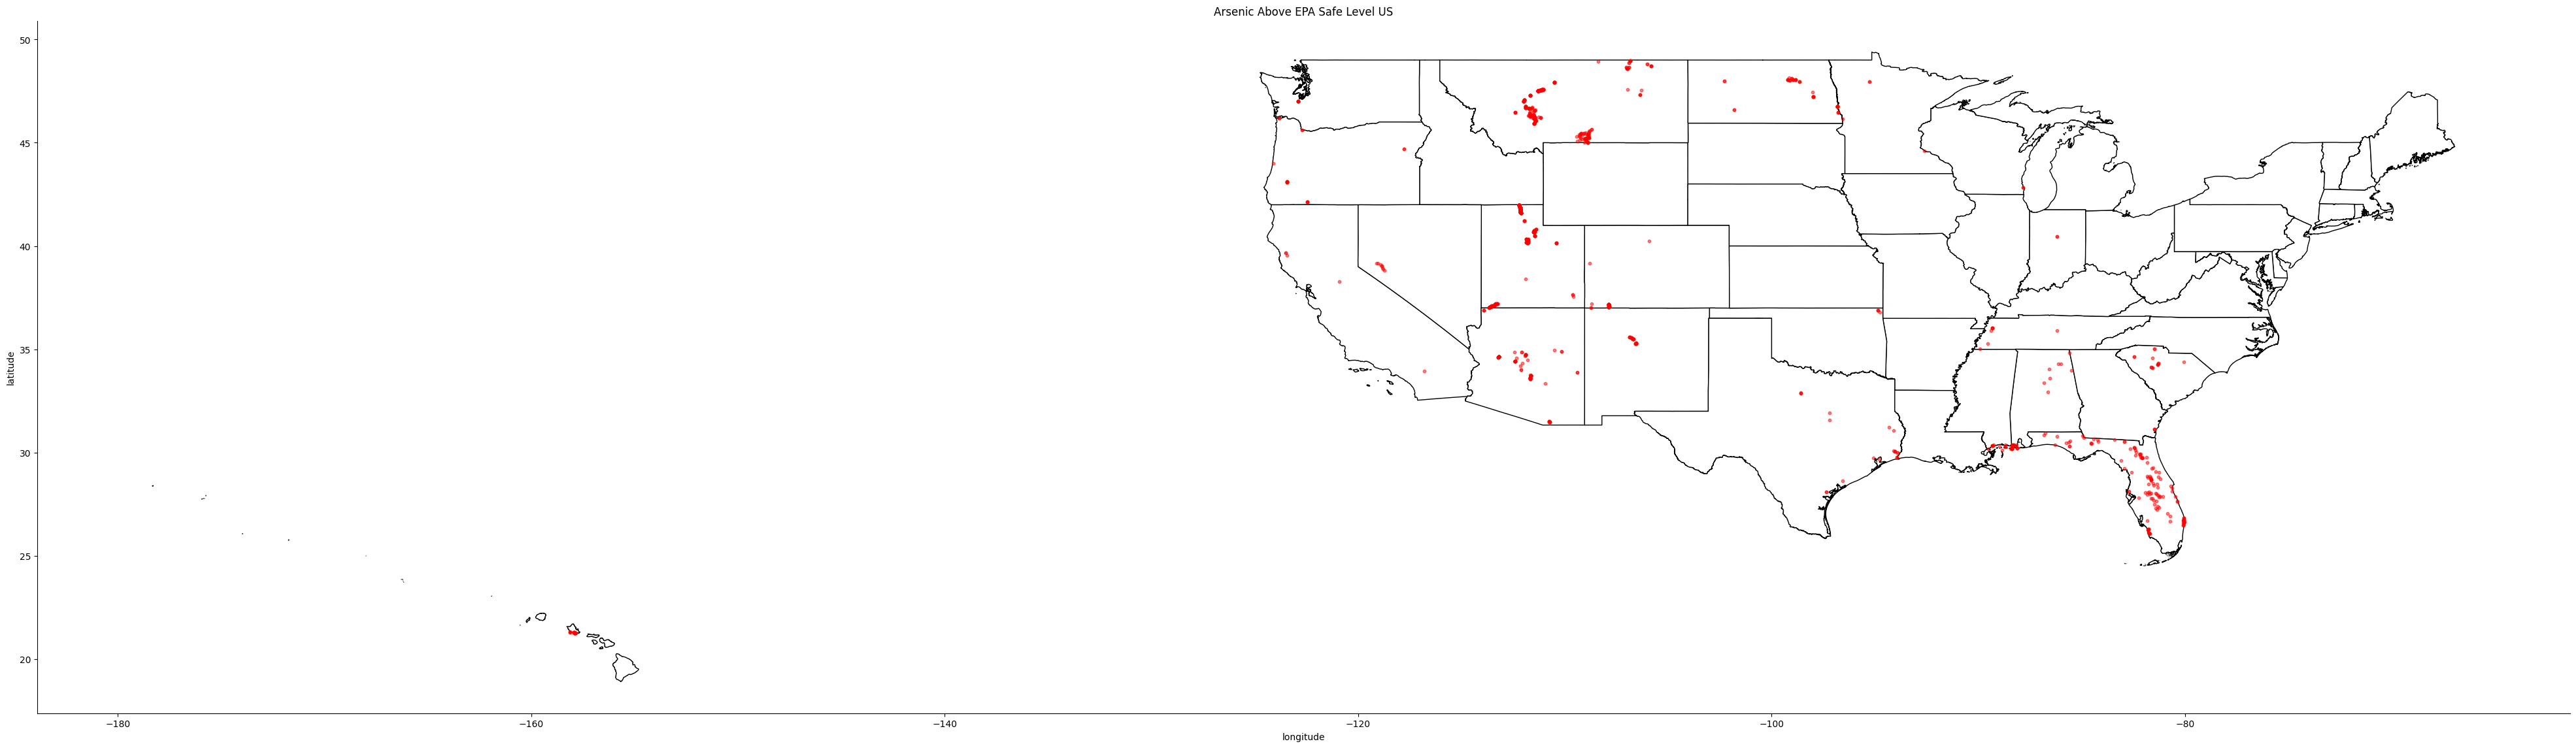

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
states.plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
adf.plot(ax=gax, color='red', markersize=10, alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Arsenic Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Lead above EPA Levels

In [ ]:
#zip coordinates into latitude and longitude together
lead["Coordinates"] = list(zip(lead['ActivityLocation/LongitudeMeasure'], lead['ActivityLocation/LatitudeMeasure']))
lead.head()

<ipython-input-74-06e52b4d8170>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead["Coordinates"] = list(zip(lead['ActivityLocation/LongitudeMeasure'], lead['ActivityLocation/LatitudeMeasure']))


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92355                         38.547228                         -75.243750   
92365                         28.463658                         -81.114335   
92366                         29.595278                         -81.679167   
92386                         27.308710                         -82.455362   
92404                         26.365087                         -81.807608   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92355               Lead            0.092000                          ug/L   
92365               Lead            0.183000                          ug/L   
92366               Lead            0.250231                          ug/L   
92386               Lead            0.200000                          ug/L   
92404               Lead            0.500000                          ug/L   

                         Coordinates  
92355         (-75.24375, 38.547228)  
92365        (-81.114335, 28.463658)  
92366     (-81.679167, 29.595278001)  
92386  (-82.455361944, 27.308709988)  
92404        (-81.807608, 26.365087)

In [ ]:
#turn coordinates tuple into shapely point object
lead["Coordinates"] = lead["Coordinates"].apply(Point)
lead.head()

<ipython-input-75-c2a708ea3bfe>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lead["Coordinates"] = lead["Coordinates"].apply(Point)


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92355                         38.547228                         -75.243750   
92365                         28.463658                         -81.114335   
92366                         29.595278                         -81.679167   
92386                         27.308710                         -82.455362   
92404                         26.365087                         -81.807608   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92355               Lead            0.092000                          ug/L   
92365               Lead            0.183000                          ug/L   
92366               Lead            0.250231                          ug/L   
92386               Lead            0.200000                          ug/L   
92404               Lead            0.500000                          ug/L   

                              Coordinates  
92355         POINT (-75.24375 38.547228)  
92365        POINT (-81.114335 28.463658)  
92366     POINT (-81.679167 29.595278001)  
92386  POINT (-82.455361944 27.308709988)  
92404        POINT (-81.807608 26.365087)

In [ ]:
#convert dataframe into geodata frame
ldf = gpd.GeoDataFrame(lead, geometry="Coordinates")
ldf.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92355                         38.547228                         -75.243750   
92365                         28.463658                         -81.114335   
92366                         29.595278                         -81.679167   
92386                         27.308710                         -82.455362   
92404                         26.365087                         -81.807608   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92355               Lead            0.092000                          ug/L   
92365               Lead            0.183000                          ug/L   
92366               Lead            0.250231                          ug/L   
92386               Lead            0.200000                          ug/L   
92404               Lead            0.500000                          ug/L   

                      Coordinates  
92355  POINT (-75.24375 38.54723)  
92365  POINT (-81.11433 28.46366)  
92366  POINT (-81.67917 29.59528)  
92386  POINT (-82.45536 27.30871)  
92404  POINT (-81.80761 26.36509)

In [ ]:
#drop entries with longitude greater than -50 and drop rows with arsenic less than 10 ug/L
k = ldf[((ldf['ActivityLocation/LongitudeMeasure'] > -50))].index
l = ldf[((ldf["ResultMeasureValue"] <= 15))].index

In [ ]:
ldf = ldf.drop(k)
ldf = ldf.drop(l)

In [ ]:
ldf['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    586
Name: ResultMeasure/MeasureUnitCode, dtype: int64

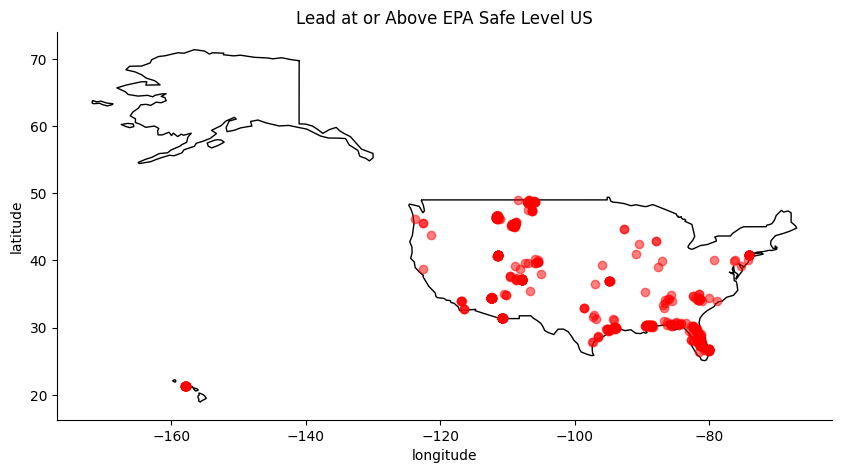

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
ldf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Lead at or Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

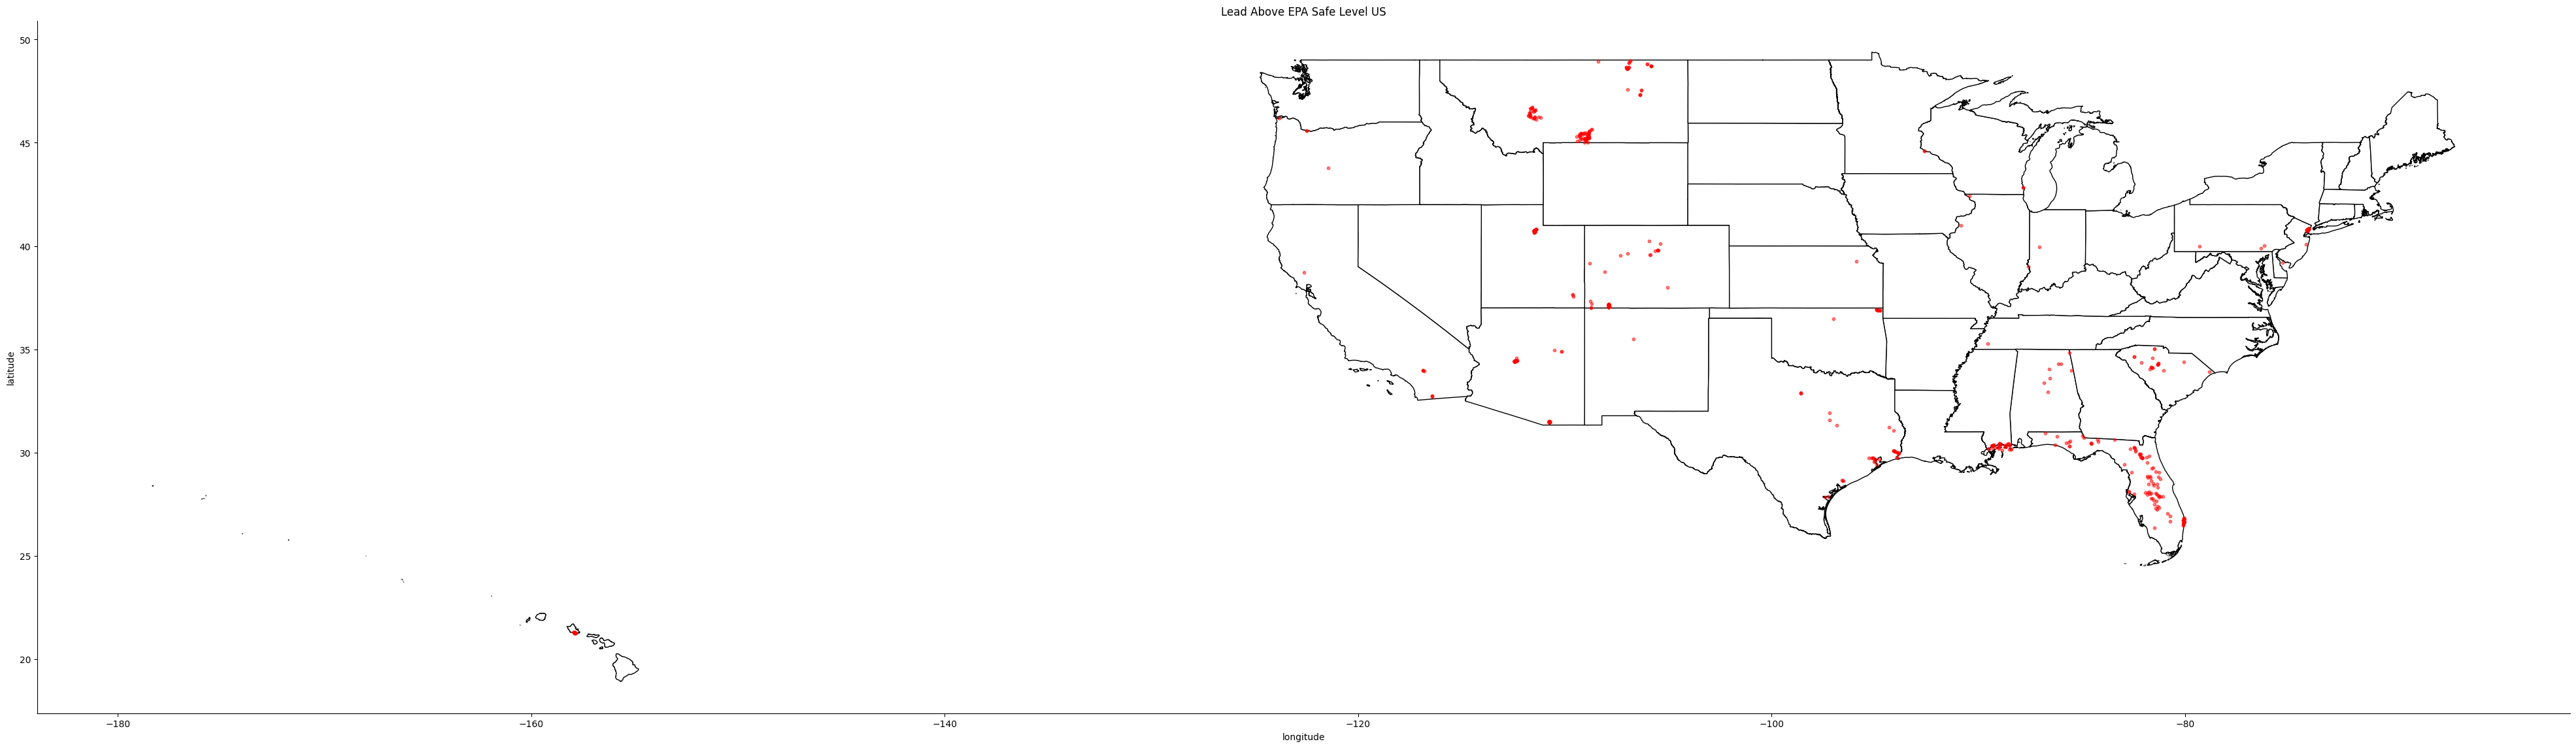

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
states.plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
ldf.plot(ax=gax, color='red', markersize=10, alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Lead Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Cadmium above EPA Levels

In [ ]:
#zip coordinates into latitude and longitude together
cadmium["Coordinates"] = list(zip(cadmium['ActivityLocation/LongitudeMeasure'], cadmium['ActivityLocation/LatitudeMeasure']))
cadmium.head()

<ipython-input-85-25cd2d0568a0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadmium["Coordinates"] = list(zip(cadmium['ActivityLocation/LongitudeMeasure'], cadmium['ActivityLocation/LatitudeMeasure']))


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92330                         40.767170                         -74.122870   
92335                         33.494019                         -79.961116   
92419                         29.664722                         -81.218056   
92443                         30.956450                         -87.276070   
92446                         29.866189                         -81.305908   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92330            Cadmium                1.00                          ug/L   
92335            Cadmium                0.10                          ug/L   
92419            Cadmium                0.50                          ug/L   
92443            Cadmium                0.02                          ug/L   
92446            Cadmium                0.50                          ug/L   

                         Coordinates  
92330          (-74.12287, 40.76717)  
92335     (-79.9611164, 33.49401928)  
92419  (-81.218055556, 29.664722222)  
92443          (-87.27607, 30.95645)  
92446   (-81.305908333, 29.86618889)

In [ ]:
#turn coordinates tuple into shapely point object
cadmium["Coordinates"] = cadmium["Coordinates"].apply(Point)
cadmium.head()

<ipython-input-86-b4aaecd5f3af>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cadmium["Coordinates"] = cadmium["Coordinates"].apply(Point)


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92330                         40.767170                         -74.122870   
92335                         33.494019                         -79.961116   
92419                         29.664722                         -81.218056   
92443                         30.956450                         -87.276070   
92446                         29.866189                         -81.305908   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92330            Cadmium                1.00                          ug/L   
92335            Cadmium                0.10                          ug/L   
92419            Cadmium                0.50                          ug/L   
92443            Cadmium                0.02                          ug/L   
92446            Cadmium                0.50                          ug/L   

                              Coordinates  
92330          POINT (-74.12287 40.76717)  
92335     POINT (-79.9611164 33.49401928)  
92419  POINT (-81.218055556 29.664722222)  
92443          POINT (-87.27607 30.95645)  
92446   POINT (-81.305908333 29.86618889)

In [ ]:
#convert dataframe into geodata frame
cdf = gpd.GeoDataFrame(cadmium, geometry="Coordinates")
cdf.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92330                         40.767170                         -74.122870   
92335                         33.494019                         -79.961116   
92419                         29.664722                         -81.218056   
92443                         30.956450                         -87.276070   
92446                         29.866189                         -81.305908   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92330            Cadmium                1.00                          ug/L   
92335            Cadmium                0.10                          ug/L   
92419            Cadmium                0.50                          ug/L   
92443            Cadmium                0.02                          ug/L   
92446            Cadmium                0.50                          ug/L   

                      Coordinates  
92330  POINT (-74.12287 40.76717)  
92335  POINT (-79.96112 33.49402)  
92419  POINT (-81.21806 29.66472)  
92443  POINT (-87.27607 30.95645)  
92446  POINT (-81.30591 29.86619)

In [ ]:
#drop entries with longitude greater than -50 and drop rows with arsenic less than 10 ug/L
m = cdf[((cdf['ActivityLocation/LongitudeMeasure'] > -50))].index
n = cdf[((cdf["ResultMeasureValue"] <= 5))].index

In [ ]:
cdf = cdf.drop(m)
cdf = cdf.drop(n)

In [ ]:
cdf['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    546
Name: ResultMeasure/MeasureUnitCode, dtype: int64

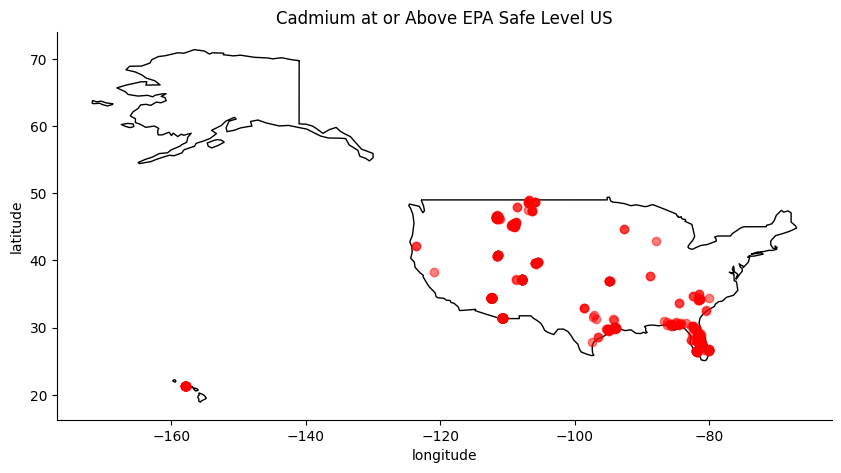

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
cdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cadmium at or Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

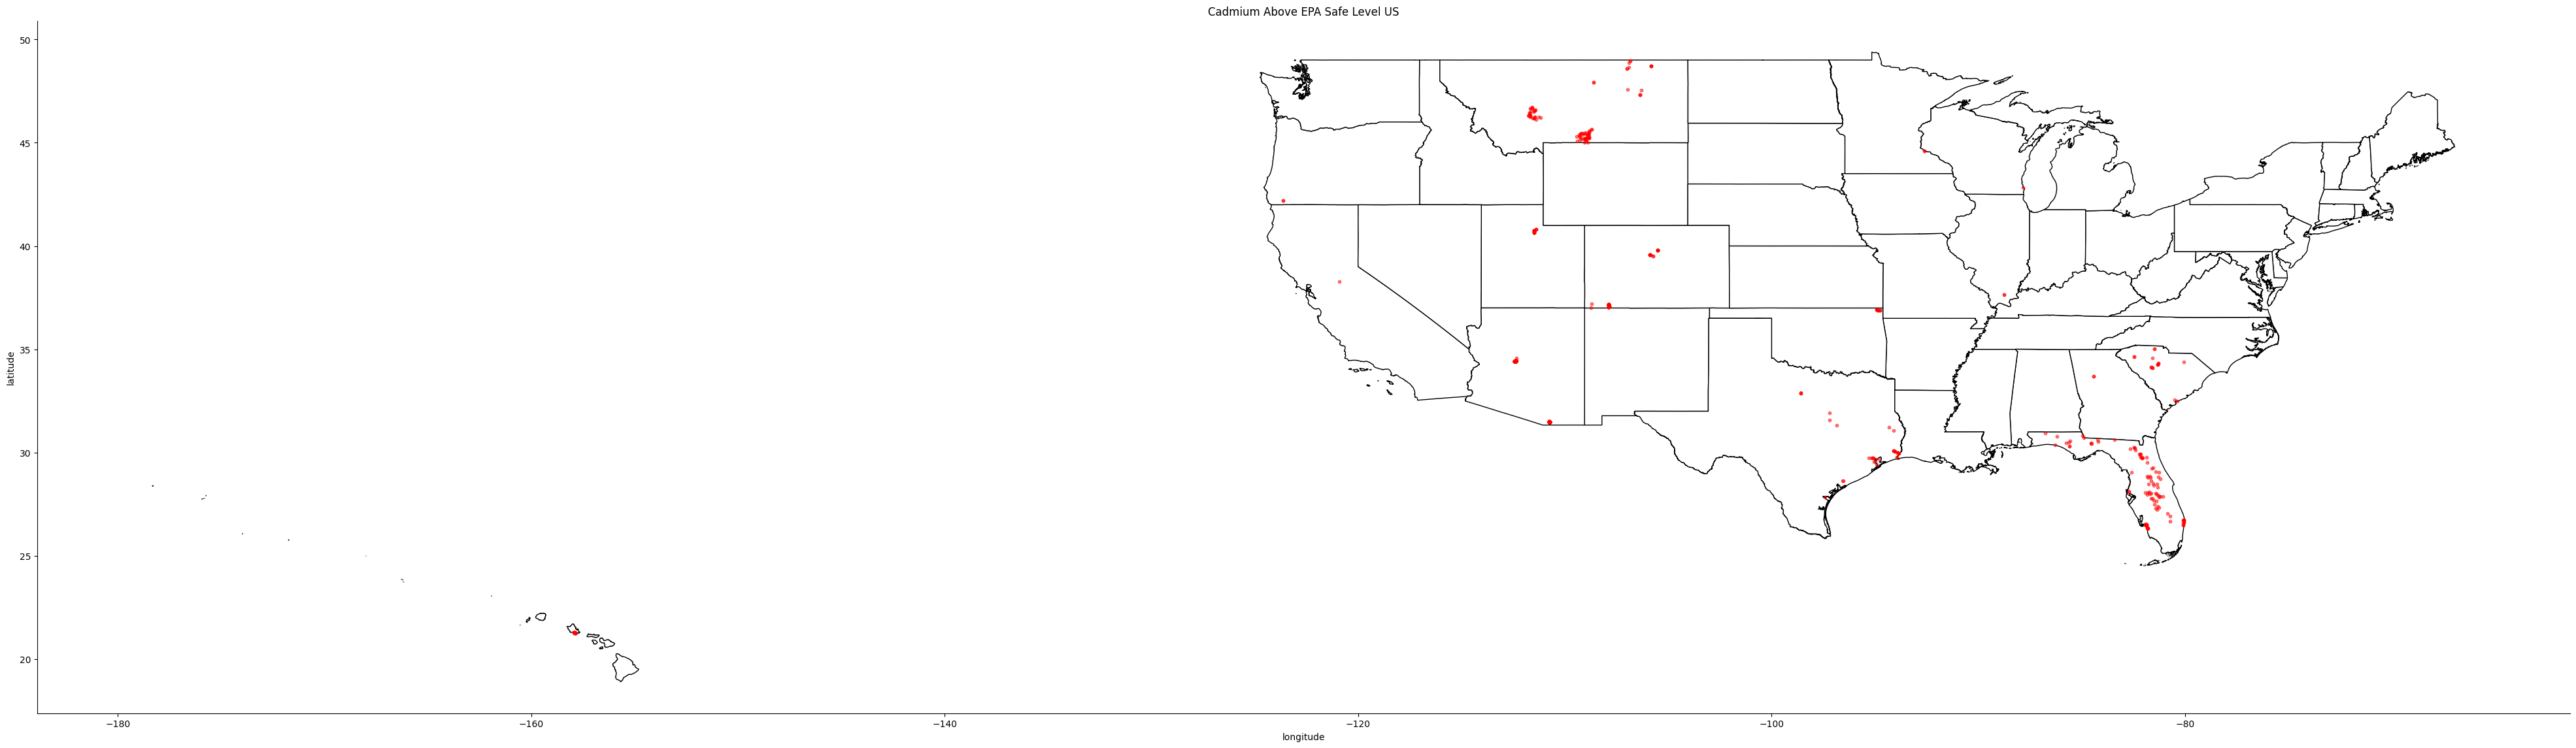

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
states.plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
cdf.plot(ax=gax, color='red', markersize=10, alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Cadmium Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#Mercury above EPA Levels

In [ ]:
#zip coordinates into latitude and longitude together
mercury["Coordinates"] = list(zip(mercury['ActivityLocation/LongitudeMeasure'], mercury['ActivityLocation/LatitudeMeasure']))
mercury.head()

<ipython-input-95-ef63fe224bdf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercury["Coordinates"] = list(zip(mercury['ActivityLocation/LongitudeMeasure'], mercury['ActivityLocation/LatitudeMeasure']))


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92388                         38.775000                         -77.246100   
92462                         34.183927                         -81.726093   
92506                         34.387377                         -80.068956   
92638                         37.054800                         -80.339800   
92725                         34.331881                         -82.575844   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92388            Mercury              0.0003                          ug/L   
92462            Mercury            180.0000                          ug/L   
92506            Mercury            450.0000                          ug/L   
92638            Mercury              0.0004                          ug/L   
92725            Mercury              0.2000                          ug/L   

                       Coordinates  
92388           (-77.2461, 38.775)  
92462  (-81.72609255, 34.18392742)  
92506  (-80.06895614, 34.38737744)  
92638          (-80.3398, 37.0548)  
92725  (-82.57584406, 34.33188084)

In [ ]:
#turn coordinates tuple into shapely point object
mercury["Coordinates"] = mercury["Coordinates"].apply(Point)
mercury.head()

<ipython-input-96-985be4708155>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mercury["Coordinates"] = mercury["Coordinates"].apply(Point)


ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92388                         38.775000                         -77.246100   
92462                         34.183927                         -81.726093   
92506                         34.387377                         -80.068956   
92638                         37.054800                         -80.339800   
92725                         34.331881                         -82.575844   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92388            Mercury              0.0003                          ug/L   
92462            Mercury            180.0000                          ug/L   
92506            Mercury            450.0000                          ug/L   
92638            Mercury              0.0004                          ug/L   
92725            Mercury              0.2000                          ug/L   

                            Coordinates  
92388           POINT (-77.2461 38.775)  
92462  POINT (-81.72609255 34.18392742)  
92506  POINT (-80.06895614 34.38737744)  
92638          POINT (-80.3398 37.0548)  
92725  POINT (-82.57584406 34.33188084)

In [ ]:
#convert dataframe into geodata frame
mdf = gpd.GeoDataFrame(mercury, geometry="Coordinates")
mdf.head()

ActivityLocation/LatitudeMeasure  ActivityLocation/LongitudeMeasure  \
92388                         38.775000                         -77.246100   
92462                         34.183927                         -81.726093   
92506                         34.387377                         -80.068956   
92638                         37.054800                         -80.339800   
92725                         34.331881                         -82.575844   

      CharacteristicName  ResultMeasureValue ResultMeasure/MeasureUnitCode  \
92388            Mercury              0.0003                          ug/L   
92462            Mercury            180.0000                          ug/L   
92506            Mercury            450.0000                          ug/L   
92638            Mercury              0.0004                          ug/L   
92725            Mercury              0.2000                          ug/L   

                      Coordinates  
92388  POINT (-77.24610 38.77500)  
92462  POINT (-81.72609 34.18393)  
92506  POINT (-80.06896 34.38738)  
92638  POINT (-80.33980 37.05480)  
92725  POINT (-82.57584 34.33188)

In [ ]:
#drop entries with longitude greater than -50 and drop rows with arsenic less than 10 ug/L
o = mdf[((mdf['ActivityLocation/LongitudeMeasure'] > -50))].index
p = mdf[((mdf["ResultMeasureValue"] <= 2))].index

In [ ]:
mdf = mdf.drop(o)
mdf = mdf.drop(p)

In [ ]:
mdf['ResultMeasure/MeasureUnitCode'].value_counts()

ug/L    513
Name: ResultMeasure/MeasureUnitCode, dtype: int64

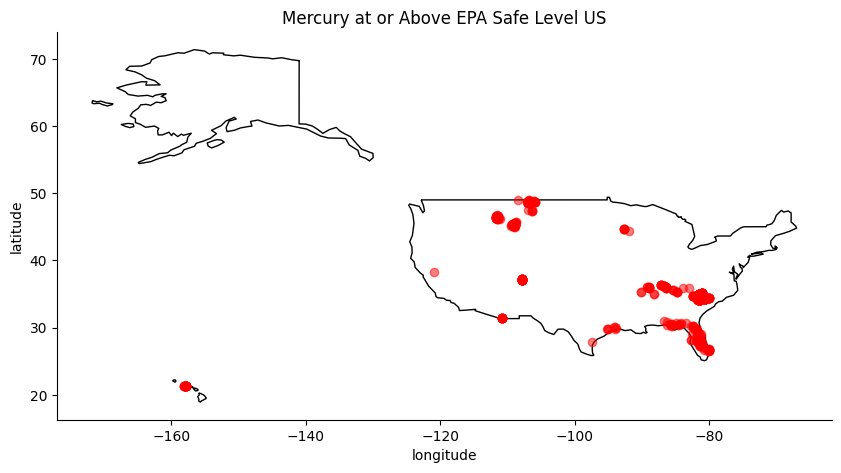

In [ ]:
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(10,10))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
world.query("name == 'United States of America'").plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
mdf.plot(ax=gax, color='red', alpha = 0.5)

gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mercury at or Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

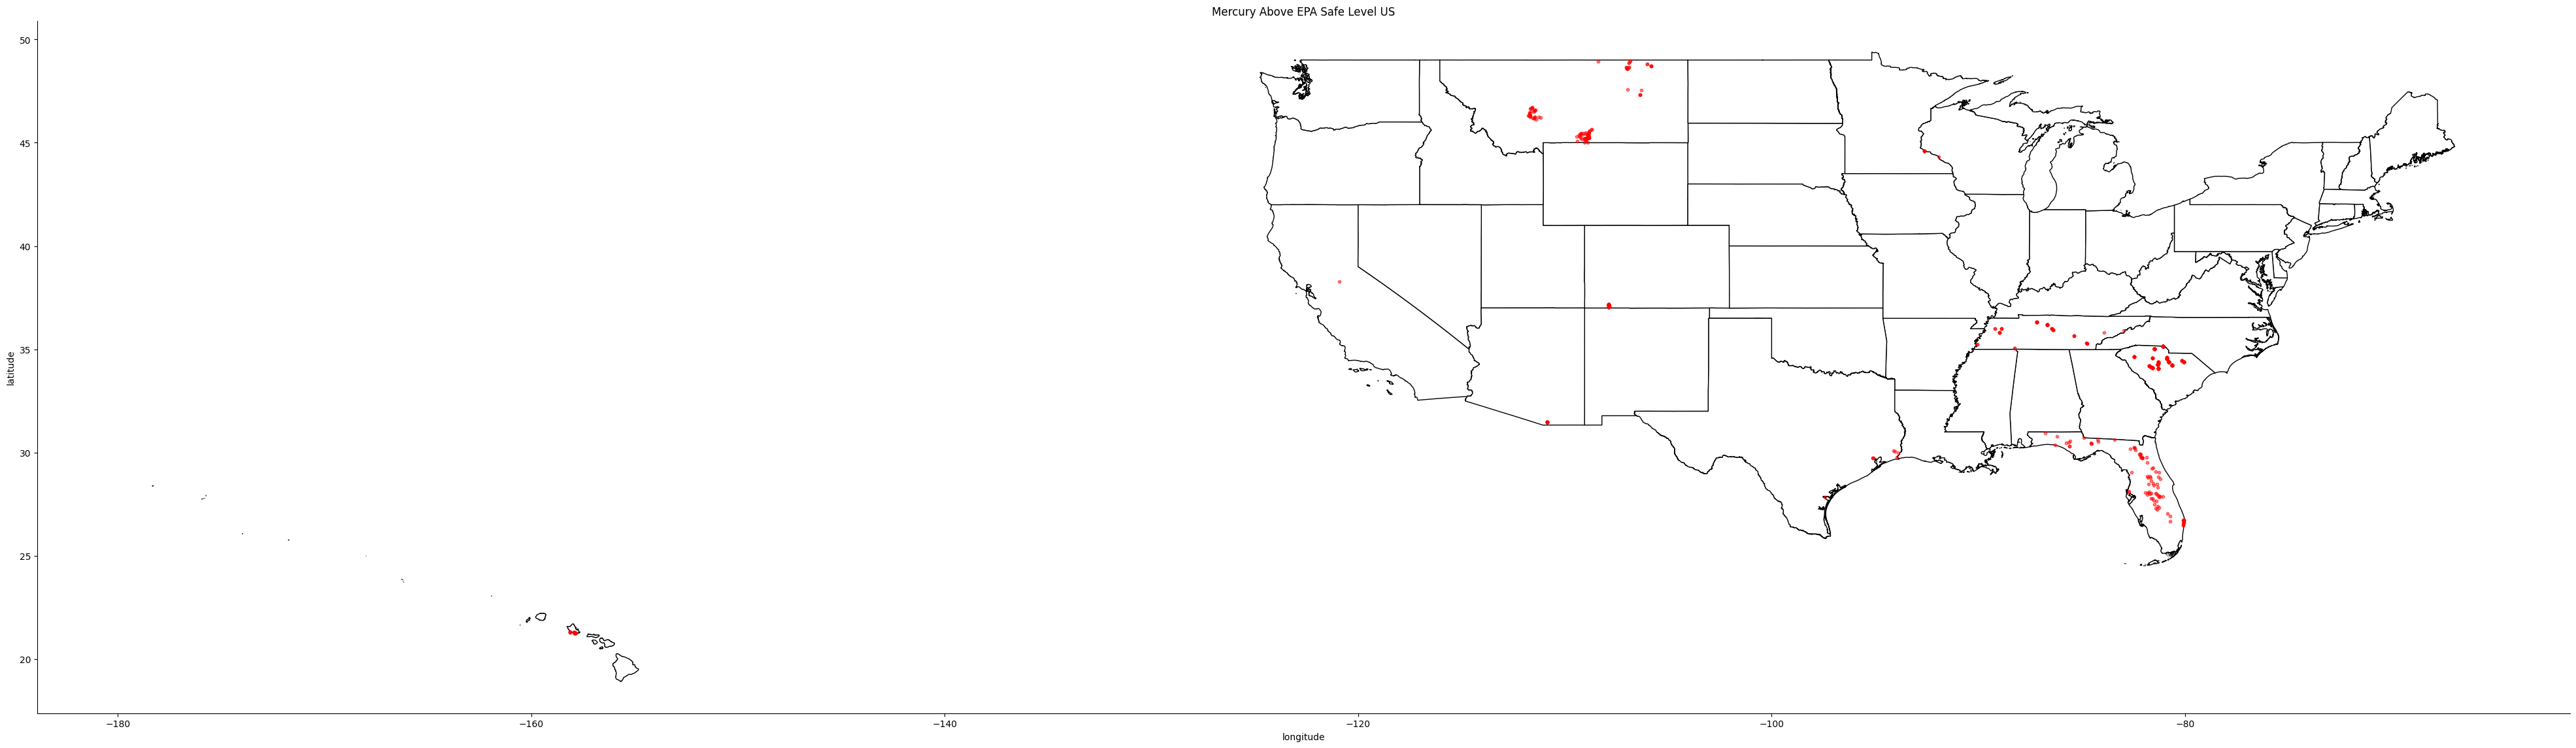

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
states.plot(ax = gax, edgecolor='black', color='white')

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
mdf.plot(ax=gax, color='red', markersize=10, alpha = 0.5)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Mercury Above EPA Safe Level US')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#load ckd by US county dataset
ckd = ("/content/gdrive/MyDrive/Team 52 Project Folders/Datasets/CKD_US_2019.csv")

ckd = pd.read_csv(ckd)

In [ ]:
ckd.head()

Main Value   County    State
0       22.35  AUTAUGA  Alabama
1       21.21  BALDWIN  Alabama
2       23.53  BARBOUR  Alabama
3       37.21     BIBB  Alabama
4       31.03   BLOUNT  Alabama

In [ ]:
ckd["County"] = ckd["County"].apply(str.lower)
ckd.head(50)

Main Value      County    State
0        22.35     autauga  Alabama
1        21.21     baldwin  Alabama
2        23.53     barbour  Alabama
3        37.21        bibb  Alabama
4        31.03      blount  Alabama
5        20.00     bullock  Alabama
6        29.46      butler  Alabama
7        25.12     calhoun  Alabama
8        27.51    chambers  Alabama
9        35.17    cherokee  Alabama
10       28.16     chilton  Alabama
11       16.13     choctaw  Alabama
12       18.55      clarke  Alabama
13       27.85        clay  Alabama
14       27.78    cleburne  Alabama
15       23.19      coffee  Alabama
16       22.37     colbert  Alabama
17       22.22     conecuh  Alabama
18       34.69       coosa  Alabama
19       34.36   covington  Alabama
20       29.73    crenshaw  Alabama
21       25.59     cullman  Alabama
22       23.10        dale  Alabama
23       26.00      dallas  Alabama
24       30.42     de kalb  Alabama
25       22.33      elmore  Alabama
26       25.14    escambia  Alabama
27       30.09      etowah  Alabama
28       29.76     fayette  Alabama
29       27.62    franklin  Alabama
30       31.65      geneva  Alabama
31       25.00      greene  Alabama
32       24.14        hale  Alabama
33       25.00       henry  Alabama
34       25.87     houston  Alabama
35       24.76     jackson  Alabama
36       24.89   jefferson  Alabama
37       21.10       lamar  Alabama
38       18.98  lauderdale  Alabama
39       26.87    lawrence  Alabama
40       15.09         lee  Alabama
41       27.63   limestone  Alabama
42       40.00     lowndes  Alabama
43       16.95       macon  Alabama
44       28.08     madison  Alabama
45       22.73     marengo  Alabama
46       22.78      marion  Alabama
47       28.31    marshall  Alabama
48       27.80      mobile  Alabama
49       21.28      monroe  Alabama

In [ ]:
ckd["County"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 3123 entries, 0 to 3122
Series name: County
Non-Null Count  Dtype 
--------------  ----- 
3123 non-null   object
dtypes: object(1)
memory usage: 24.5+ KB


In [ ]:
county["NAME"] = county["NAME"].apply(str.lower)
county.rename(columns = {'NAME':"County"}, inplace = True)

county.rename(columns = {'STATE_NAME':"State"}, inplace = True)
county.head(50)

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID        County  \
0       01      069  00161560  0500000US01069  01069       houston   
1       01      023  00161537  0500000US01023  01023       choctaw   
2       01      005  00161528  0500000US01005  01005       barbour   
3       01      107  00161580  0500000US01107  01107       pickens   
4       01      033  00161542  0500000US01033  01033       colbert   
5       04      012  00043540  0500000US04012  04012        la paz   
6       04      001  00025441  0500000US04001  04001        apache   
7       05      081  00066874  0500000US05081  05081  little river   
8       05      121  00069178  0500000US05121  05121      randolph   
9       06      037  00277283  0500000US06037  06037   los angeles   
10      06      097  01657246  0500000US06097  06097        sonoma   
11      06      001  01675839  0500000US06001  06001       alameda   
12      06      045  00277287  0500000US06045  06045     mendocino   
13      06      015  01682074  0500000US06015  06015     del norte   
14      08      077  00198154  0500000US08077  08077          mesa   
15      08      083  00198157  0500000US08083  08083     montezuma   
16      08      067  00198148  0500000US08067  08067      la plata   
17      06      055  00277292  0500000US06055  06055          napa   
18      10      005  00217269  0500000US10005  10005        sussex   
19      12      086  00295755  0500000US12086  12086    miami-dade   
20      12      071  00295758  0500000US12071  12071           lee   
21      12      037  00306911  0500000US12037  12037      franklin   
22      12      033  00295737  0500000US12033  12033      escambia   
23      17      031  01784766  0500000US17031  17031          cook   
24      17      017  00424210  0500000US17017  17017          cass   
25      17      109  01784729  0500000US17109  17109     mcdonough   
26      13      245  00358024  0500000US13245  13245      richmond   
27      17      041  00424222  0500000US17041  17041       douglas   
28      13      103  00350219  0500000US13103  13103     effingham   
29      16      027  00399406  0500000US16027  16027        canyon   
30      26      103  01622994  0500000US26103  26103     marquette   
31      18      061  00451677  0500000US18061  18061      harrison   
32      19      177  00465277  0500000US19177  19177     van buren   
33      19      045  00465211  0500000US19045  19045       clinton   
34      19      163  00465270  0500000US19163  19163         scott   
35      18      161  00450395  0500000US18161  18161         union   
36      26      107  01622996  0500000US26107  26107       mecosta   
37      26      063  01622974  0500000US26063  26063         huron   
38      36      067  00974132  0500000US36067  36067      onondaga   
39      20      175  00485050  0500000US20175  20175        seward   
40      36      071  00974134  0500000US36071  36071        orange   
41      08      031  00198131  0500000US08031  08031        denver   
42      36      017  00974107  0500000US36017  36017      chenango   
43      21      101  00516897  0500000US21101  21101     henderson   
44      21      195  00516944  0500000US21195  21195          pike   
45      08      019  00198125  0500000US08019  08019   clear creek   
46      08      055  00198143  0500000US08055  08055      huerfano   
47      21      093  00516893  0500000US21093  21093        hardin   
48      21      127  00516910  0500000US21127  21127      lawrence   
49      26      099  01622992  0500000US26099  26099        macomb   

               NAMELSAD STUSPS       State LSAD        ALAND      AWATER  \
0        Houston County     AL     Alabama   06   1501742235     4795415   
1        Choctaw County     AL     Alabama   06   2365900083    19114321   
2        Barbour County     AL     Alabama   06   2292160151    50523213   
3        Pickens County     AL     Alabama   06   2282835044    22621093   
4        Colbert County     AL     Alabama   06   15

In [ ]:
county["County"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3144 entries, 0 to 3234
Series name: County
Non-Null Count  Dtype 
--------------  ----- 
3144 non-null   object
dtypes: object(1)
memory usage: 49.1+ KB


In [ ]:
#merge dataframes based on matching county names
ckd_1 = pd.merge(ckd, county, on = ["County", "State"])
ckd_1

Main Value      County    State STATEFP COUNTYFP  COUNTYNS  \
0          22.35     autauga  Alabama      01      001  00161526   
1          21.21     baldwin  Alabama      01      003  00161527   
2          23.53     barbour  Alabama      01      005  00161528   
3          37.21        bibb  Alabama      01      007  00161529   
4          31.03      blount  Alabama      01      009  00161530   
...          ...         ...      ...     ...      ...       ...   
3020       17.86  sweetwater  Wyoming      56      037  01609192   
3021        9.93       teton  Wyoming      56      039  01605083   
3022       14.04       uinta  Wyoming      56      041  01605084   
3023       16.87    washakie  Wyoming      56      043  01605085   
3024       13.11      weston  Wyoming      56      045  01605086   

            AFFGEOID  GEOID           NAMELSAD STUSPS LSAD        ALAND  \
0     0500000US01001  01001     Autauga County     AL   06   1539631461   
1     0500000US01003  01003     Baldwin County     AL   06   4117724893   
2     0500000US01005  01005     Barbour County     AL   06   2292160151   
3     0500000US01007  01007        Bibb County     AL   06   1612188713   
4     0500000US01009  01009      Blount County     AL   06   1670259093   
...              ...    ...                ...    ...  ...          ...   
3020  0500000US56037  56037  Sweetwater County     WY   06  27005754360   
3021  0500000US56039  56039       Teton County     WY   06  10351790287   
3022  0500000US56041  56041       Uinta County     WY   06   5391631764   
3023  0500000US56043  56043    Washakie County     WY   06   5798152470   
3024  0500000US56045  56045      Weston County     WY   06   6210804121   

          AWATER                                           geometry  
0       25677536  POLYGON ((-86.92120 32.65754, -86.92035 32.658...  
1     1132887353  POLYGON ((-88.02858 30.22676, -88.02399 30.230...  
2       50523213  POLYGON ((-85.74803 31.61918, -85.74544 31.618...  
3        9572302  POLYGON ((-87.42194 33.00338, -87.31854 33.006...  
4       14860281  POLYGON ((-86.96336 33.85822, -86.95967 33.857...  
...          ...                                                ...  
3020   166230245  POLYGON ((-110.05438 42.01103, -110.05436 42.0...  
3021   570858887  POLYGON ((-111.05361 44.66627, -110.75076 44.6...  
3022    16625817  POLYGON ((-111.04662 41.15604, -111.04659 41.2...  
3023    10415890  POLYGON ((-108.55056 44.16846, -108.50652 44.1...  
3024     5225499  POLYGON ((-105.08078 43.96622, -105.07928 44.1...  

[3025 rows x 14 columns]

In [ ]:
ckd_1.to_csv('ckd_1.csv')

In [ ]:
adf.to_csv('adf.csv')
ldf.to_csv('ldf.csv')
cdf.to_csv('cdf.csv')
mdf.to_csv('mdf.csv')

In [ ]:
ckd_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3025 entries, 0 to 3024
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Main Value  3025 non-null   float64 
 1   County      3025 non-null   object  
 2   State       3025 non-null   object  
 3   STATEFP     3025 non-null   object  
 4   COUNTYFP    3025 non-null   object  
 5   COUNTYNS    3025 non-null   object  
 6   AFFGEOID    3025 non-null   object  
 7   GEOID       3025 non-null   object  
 8   NAMELSAD    3025 non-null   object  
 9   STUSPS      3025 non-null   object  
 10  LSAD        3025 non-null   object  
 11  ALAND       3025 non-null   int64   
 12  AWATER      3025 non-null   int64   
 13  geometry    3025 non-null   geometry
dtypes: float64(1), geometry(1), int64(2), object(10)
memory usage: 354.5+ KB


In [ ]:
ckd_1["Main Value"].info()

<class 'pandas.core.series.Series'>
Int64Index: 3025 entries, 0 to 3024
Series name: Main Value
Non-Null Count  Dtype  
--------------  -----  
3025 non-null   float64
dtypes: float64(1)
memory usage: 47.3 KB


In [ ]:
ckd_1.isna().sum()

Main Value    0
County        0
State         0
STATEFP       0
COUNTYFP      0
COUNTYNS      0
AFFGEOID      0
GEOID         0
NAMELSAD      0
STUSPS        0
LSAD          0
ALAND         0
AWATER        0
geometry      0
dtype: int64

<ipython-input-114-9e81ff619212>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  plt.subplot(121), sns.distplot(ckd_1['Main Value'])


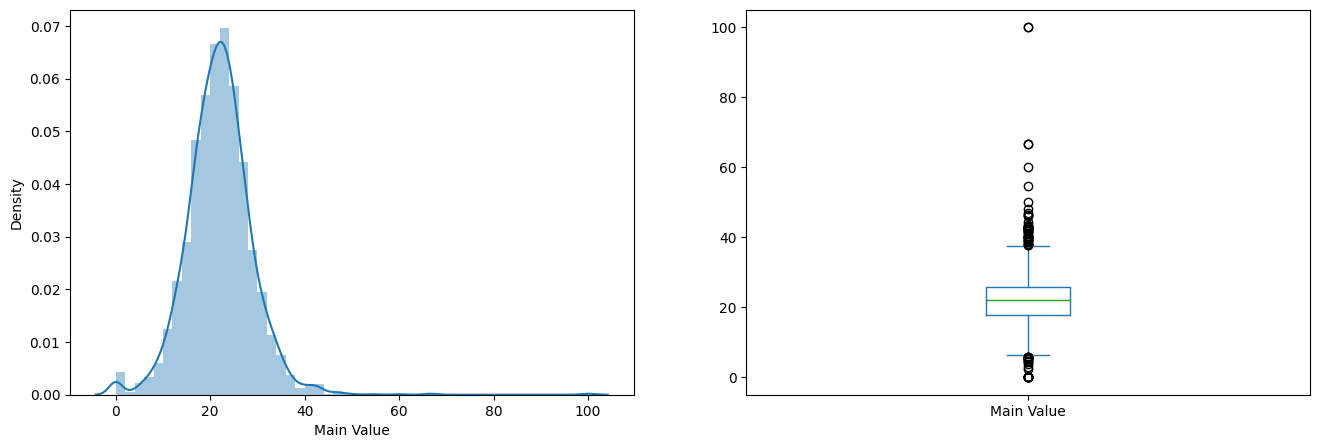

In [ ]:
plt.subplot(121), sns.distplot(ckd_1['Main Value'])
plt.subplot(122), ckd_1['Main Value'].plot.box(figsize=(16,5))
plt.show()

In [ ]:
type(ckd_1)

pandas.core.frame.DataFrame

In [ ]:
#COnvert ckd_1 dataframe into geopandas dataframe
ckd_1 = gpd.GeoDataFrame(ckd_1,  geometry = ckd_1['geometry'])

In [ ]:
type(ckd_1)

geopandas.geodataframe.GeoDataFrame

In [ ]:
ckd_1.crs = "EPSG: 4326"

In [ ]:
ckd_1= ckd_1.to_crs("EPSG: 4326")

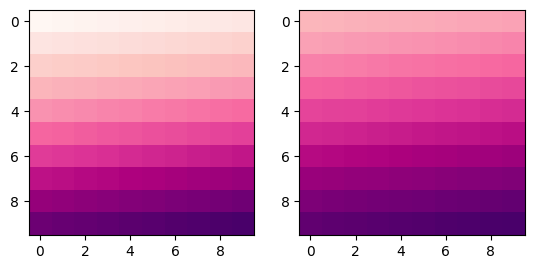

In [ ]:
def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
  new_cmap = colors.LinearSegmentedColormap.from_list('trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),cmap(np.linspace(minval, maxval, n)))

  return new_cmap

arr = np.linspace(0, 50, 100).reshape((10, 10))
fig, ax = plt.subplots(ncols=2)
cmap = plt.get_cmap('RdPu')
new_cmap = truncate_colormap(cmap, 0.3, 1)
ax[0].imshow(arr, interpolation='nearest', cmap=cmap)
ax[1].imshow(arr, interpolation='nearest', cmap=new_cmap)
plt.show()

In [ ]:

#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(50,50))

# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', cmap = 'RdPu', ax = gax, edgecolor='black', legend = True)

# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

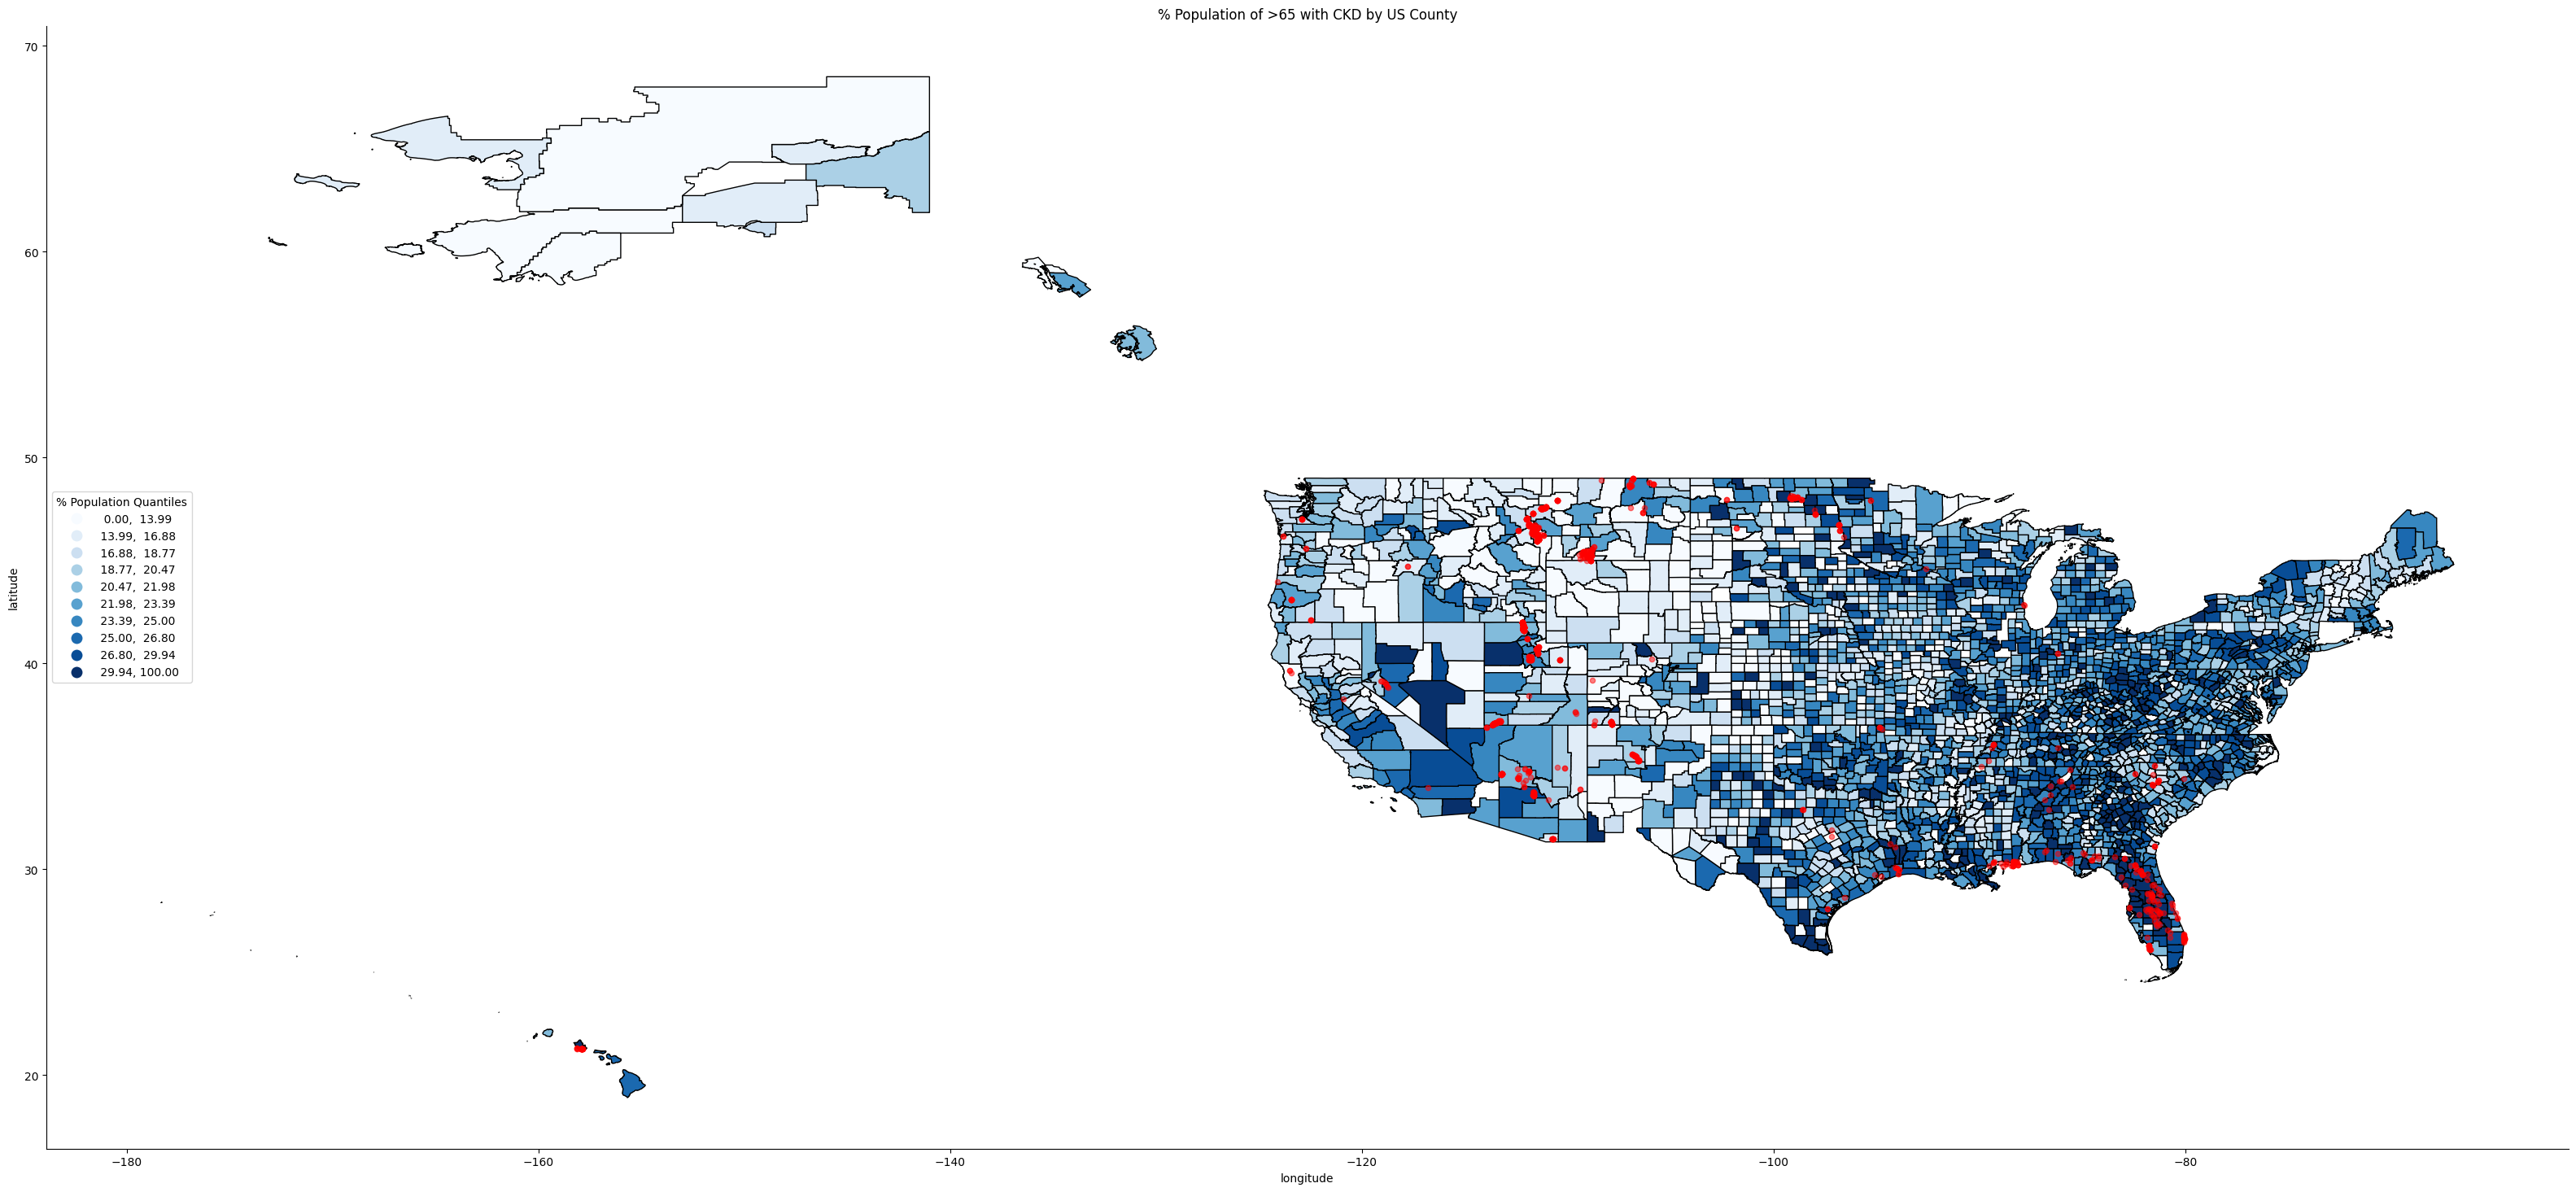

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40, 24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
adf.plot(ax=gax, marker = 'o', color='red', markersize=20, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
#ldf.plot(ax=gax, marker = 'o', color='yellow', markersize=10, alpha = 0.5, legend = False)#lead exceeding EPA Limit
#cdf.plot(ax=gax, marker = 'o', color='orange', markersize=10, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
#mdf.plot(ax=gax, marker = 'o', color='green', markersize=10, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

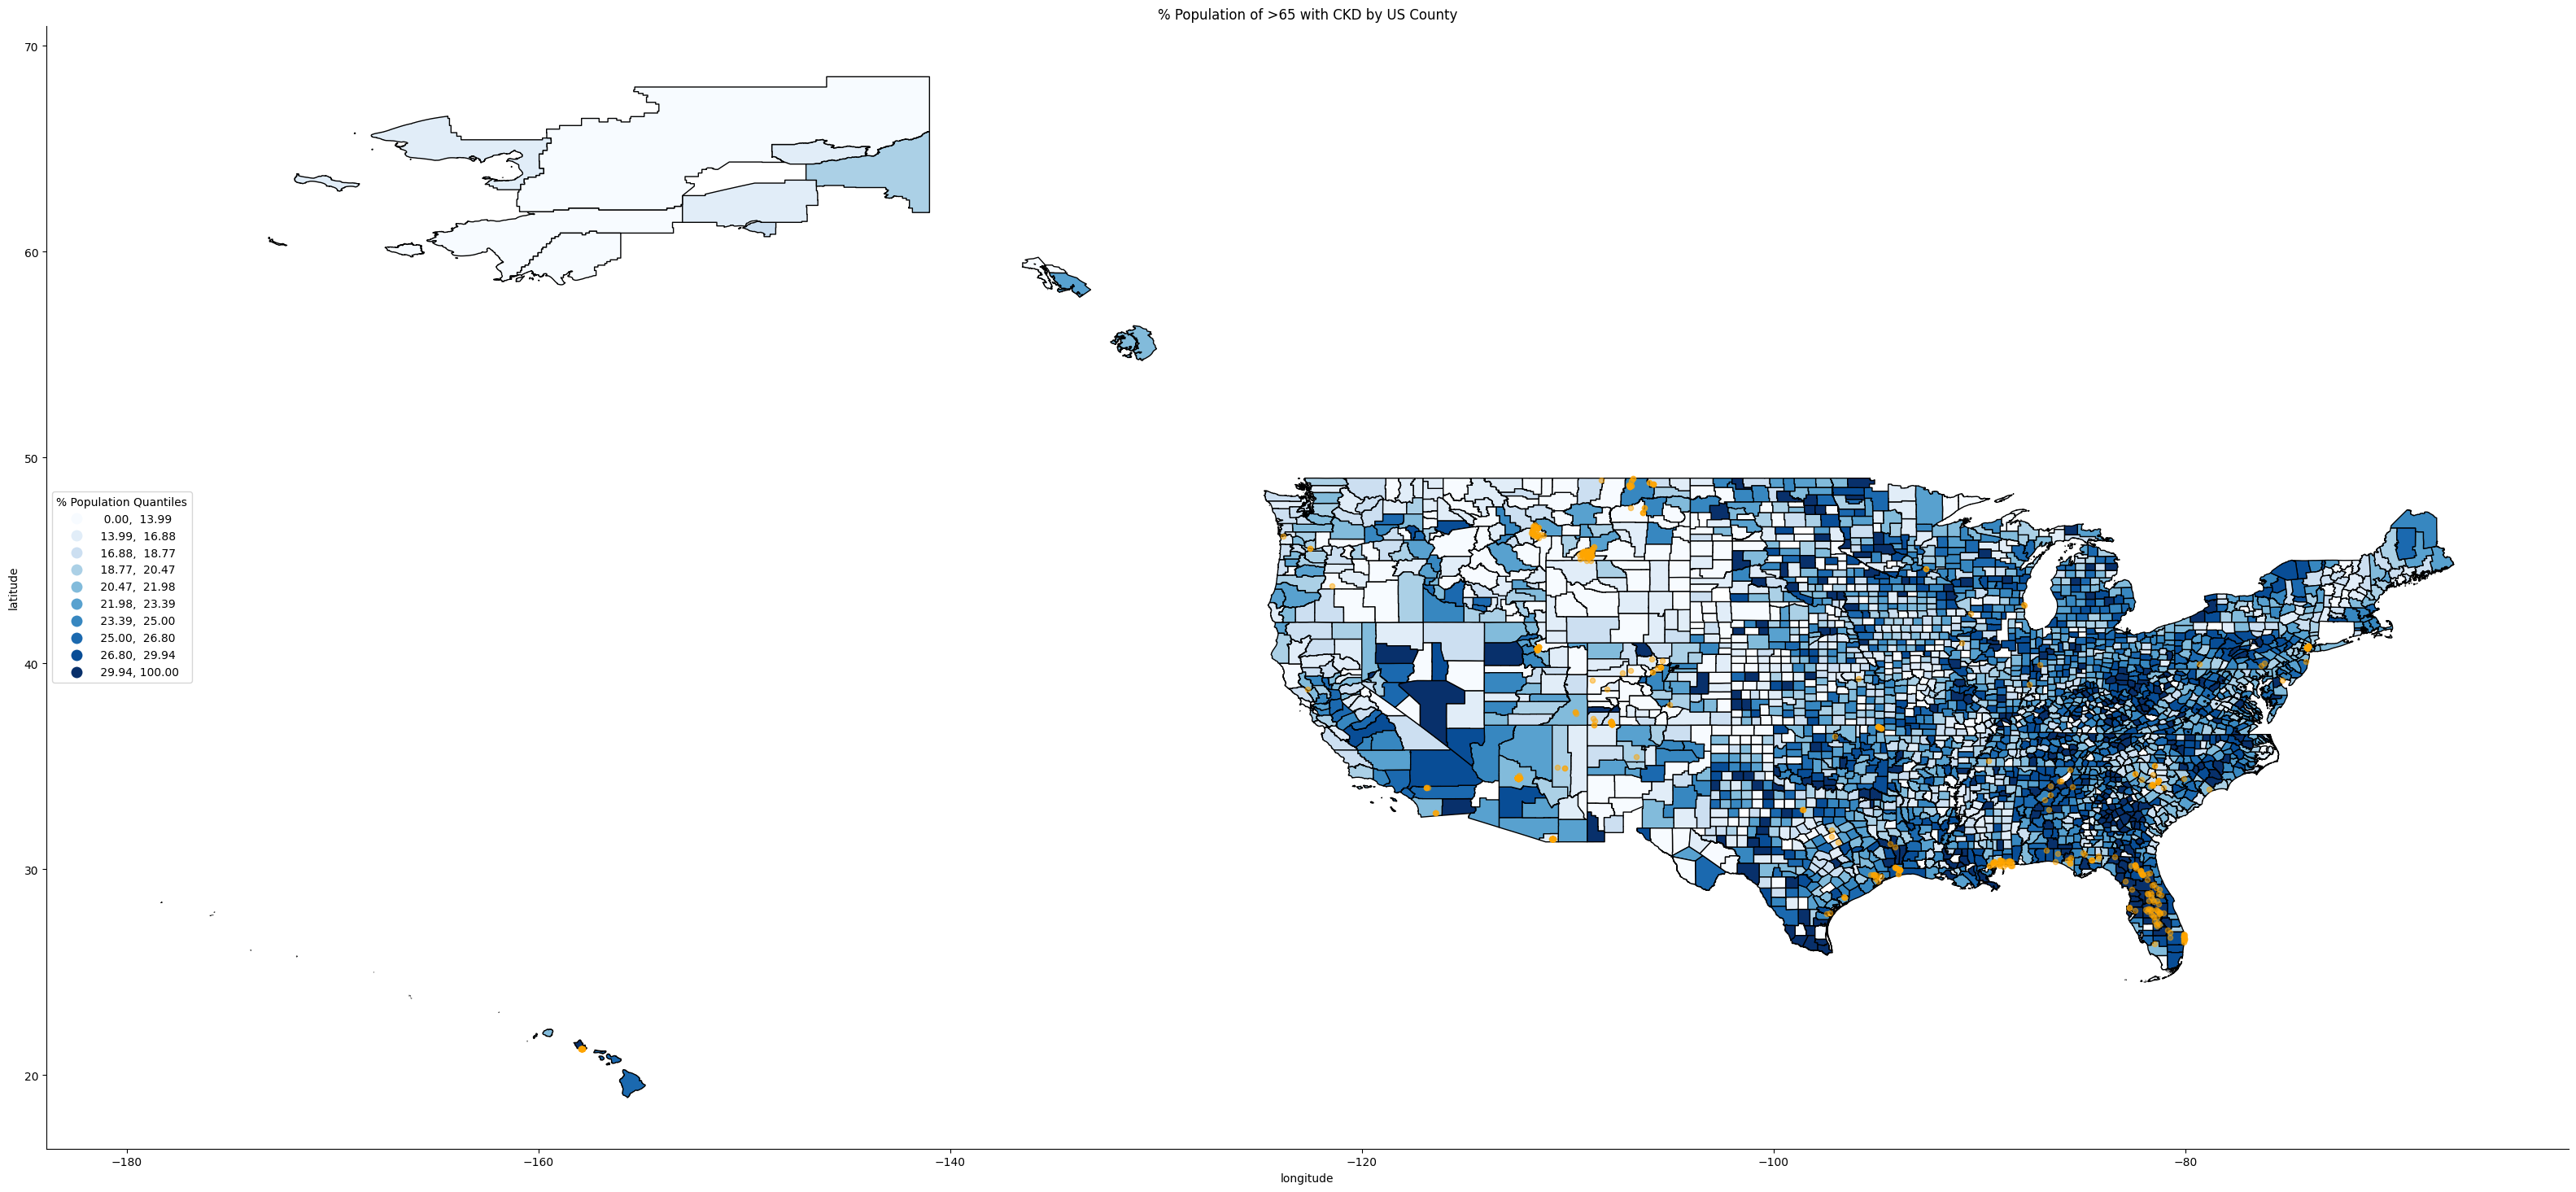

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
#adf.plot(ax=gax, marker = 'o', color='red', markersize=10, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
ldf.plot(ax=gax, marker = 'o', color='orange', markersize=20, alpha = 0.5, legend = False)#lead exceeding EPA Limit
#cdf.plot(ax=gax, marker = 'o', color='orange', markersize=10, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
#mdf.plot(ax=gax, marker = 'o', color='green', markersize=10, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

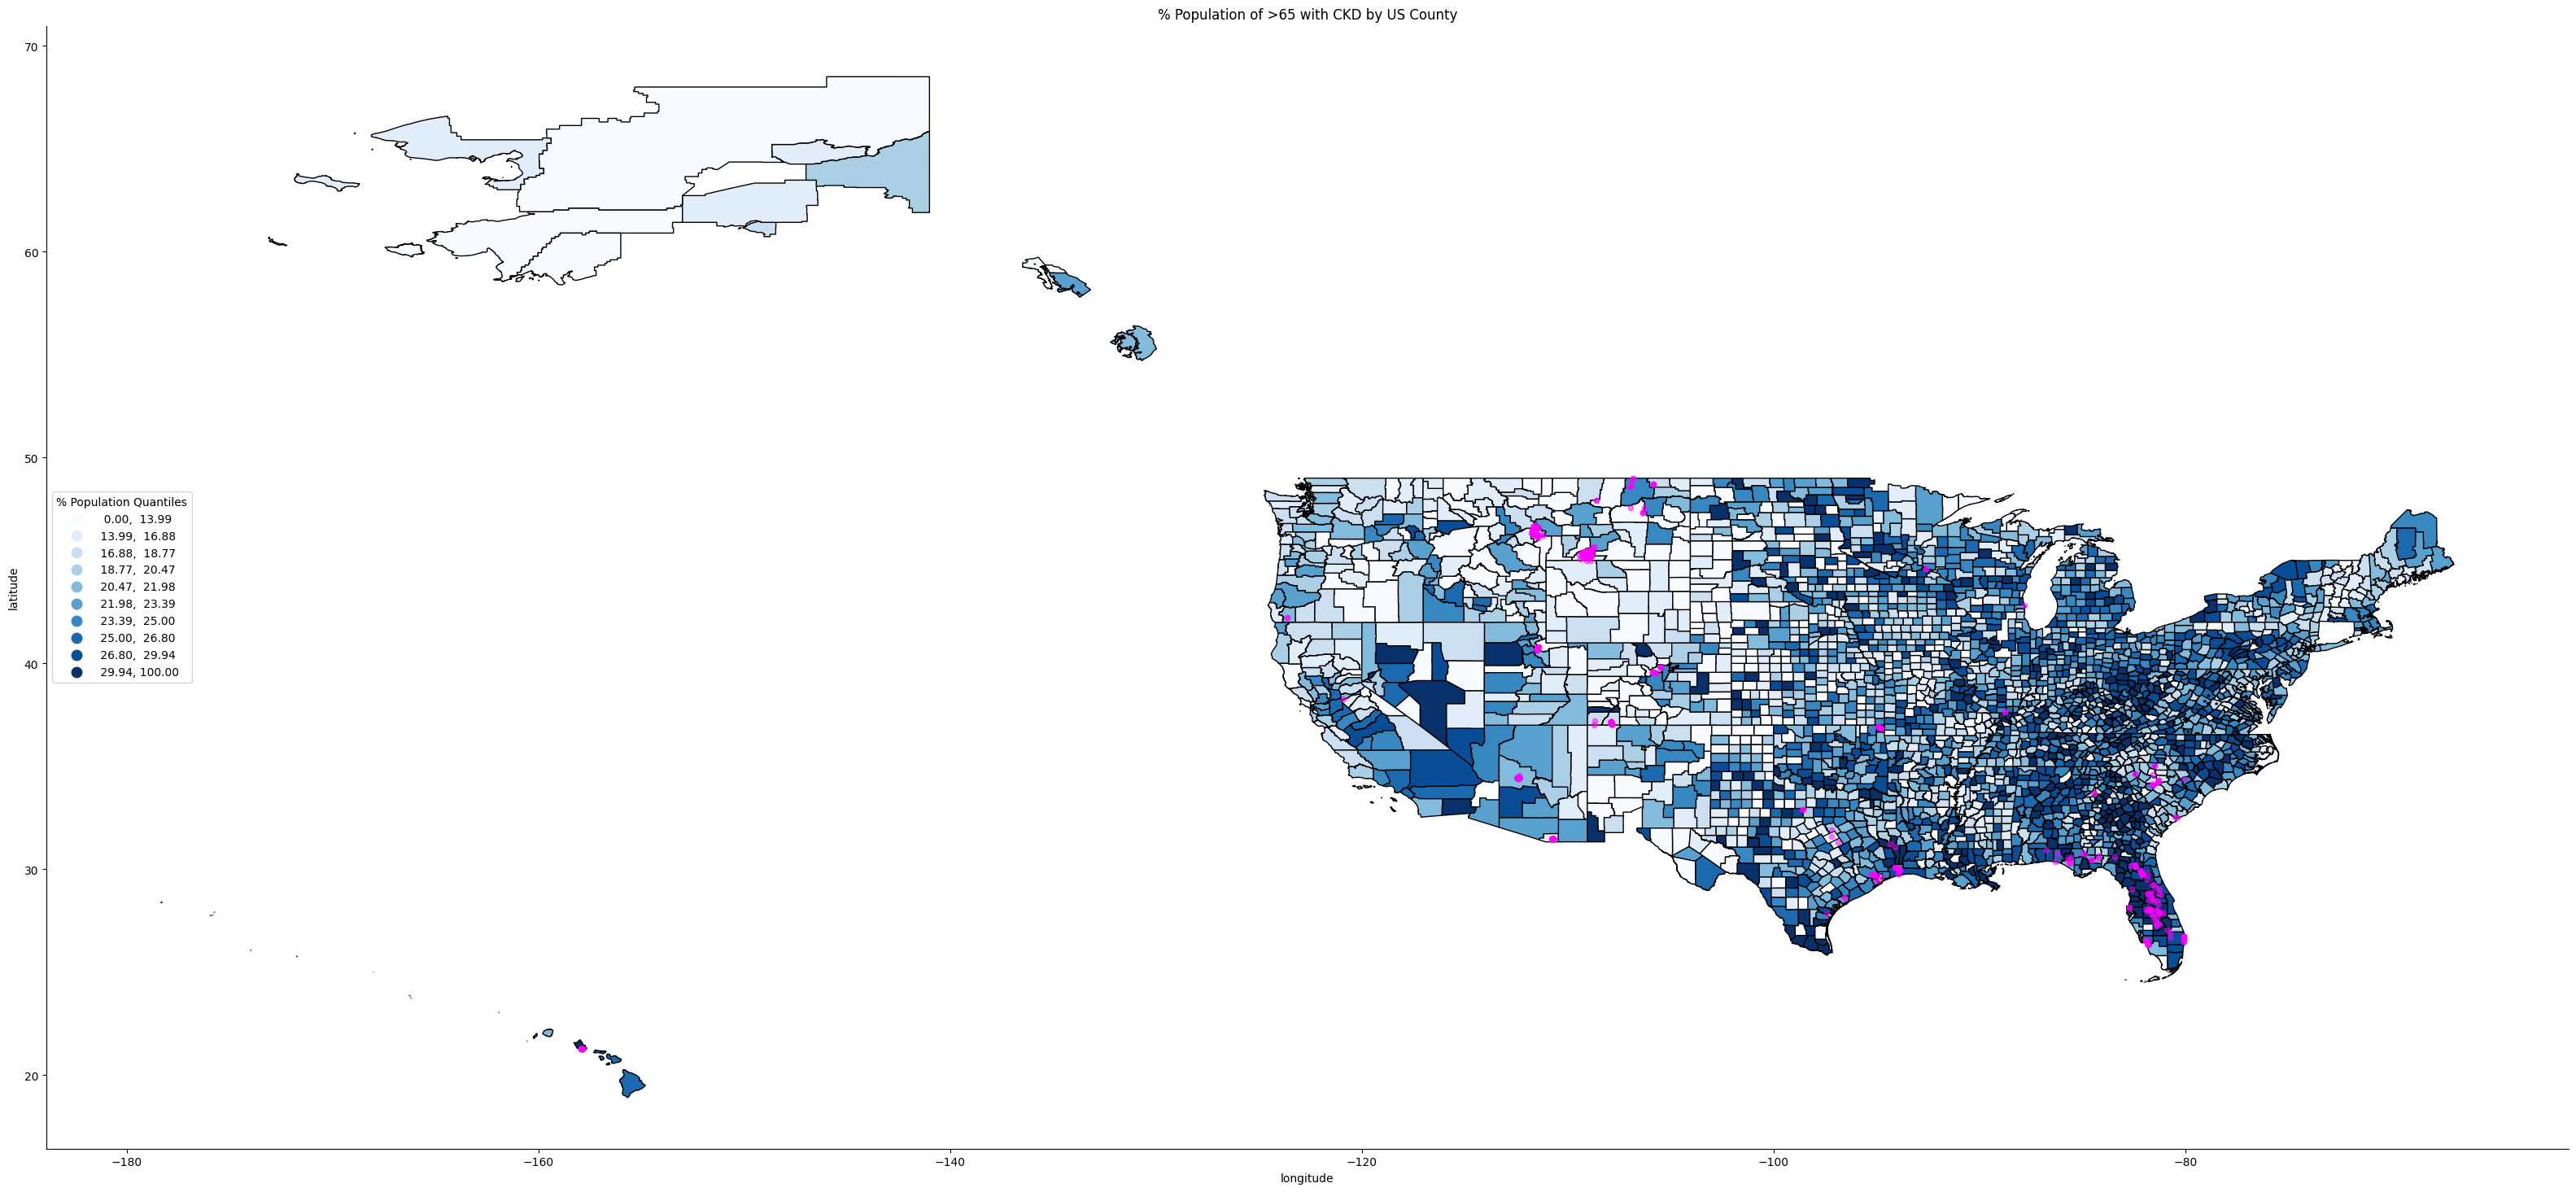

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
#adf.plot(ax=gax, marker = 'o', color='red', markersize=10, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
#ldf.plot(ax=gax, marker = 'o', color='yellow', markersize=10, alpha = 0.5, legend = False)#lead exceeding EPA Limit
cdf.plot(ax=gax, marker = 'o', color='fuchsia', markersize=20, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
#mdf.plot(ax=gax, marker = 'o', color='green', markersize=10, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

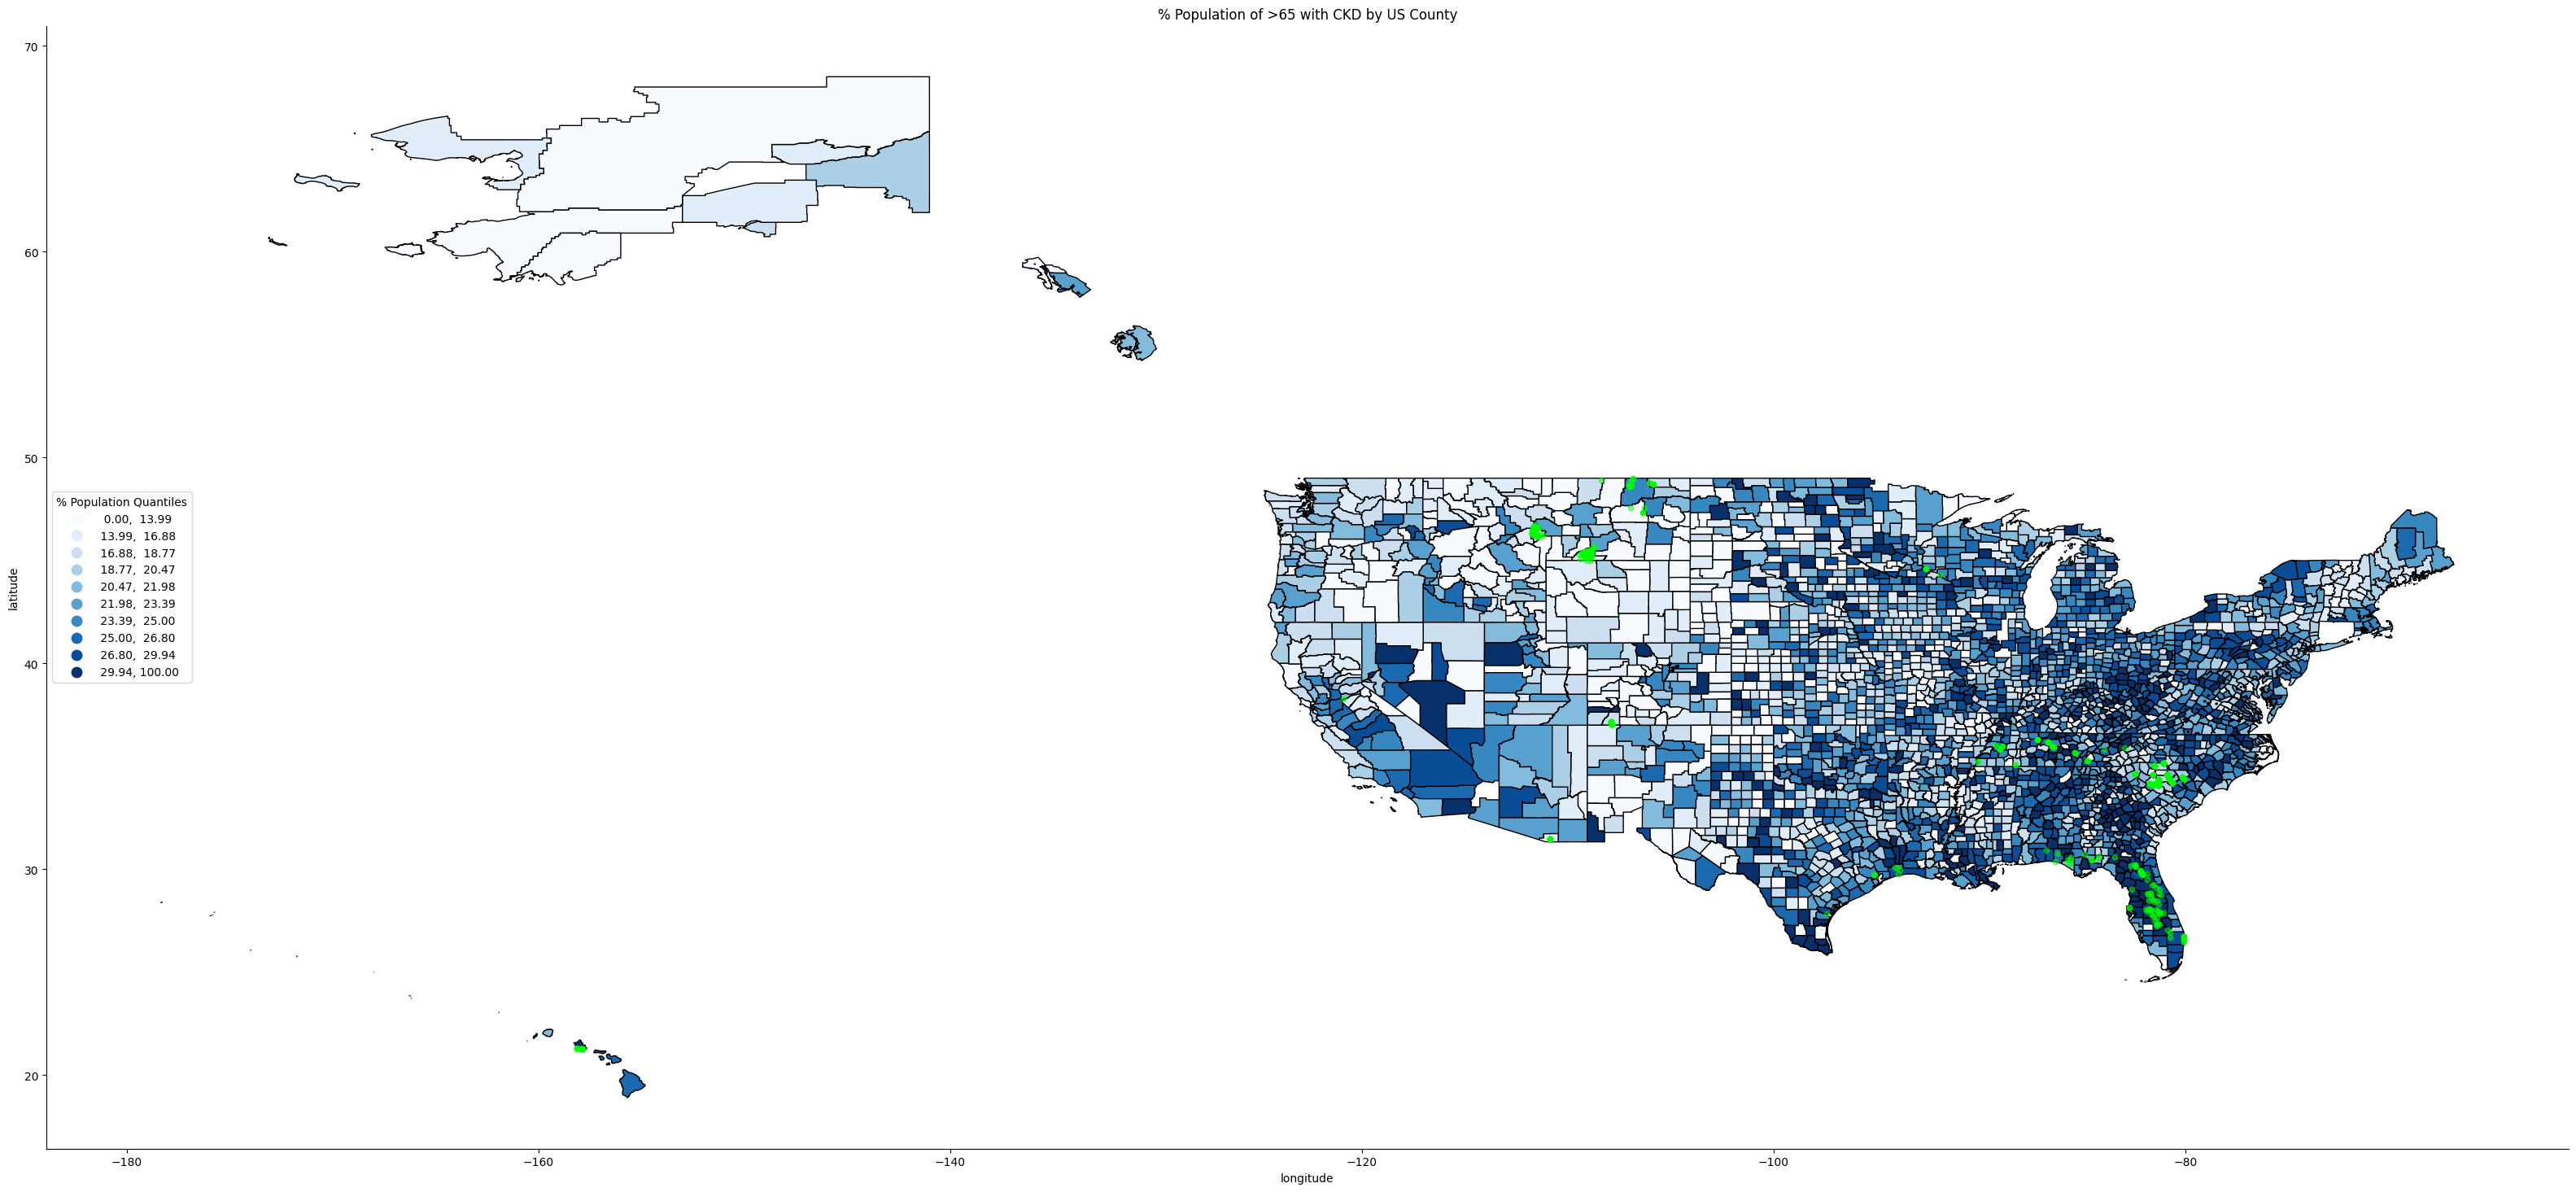

In [ ]:
#markersize = adf['ResultMeasureValue']/10*20
# Step 3: Plot the cities onto the map
# We mostly use the code from before --- we still want the country borders plotted --- and we
# add a command to plot the cities
fig, gax = plt.subplots(figsize=(40,24))



# By only plotting rows in which the continent is 'South America' we only plot, well,
# South America.
ckd_1.plot(column = 'Main Value', scheme = "QUANTILES", k = 10, cmap = 'Blues', ax = gax, edgecolor='black', legend = True, legend_kwds={'loc': 'center left', 'title': '% Population Quantiles'})


# This plot the cities. It's the same syntax, but we are plotting from a different GeoDataFrame.
# I want the cities as pale red dots.
#ckd_1.plot(column = 'Main Value', cmap = 'Blues', ax=gax, legend = True)
#adf.plot(ax=gax, marker = 'o', color='red', markersize=10, alpha = 0.5, legend = False)#arsenic exceeding EPA limit
#ldf.plot(ax=gax, marker = 'o', color='yellow', markersize=10, alpha = 0.5, legend = False)#lead exceeding EPA Limit
#cdf.plot(ax=gax, marker = 'o', color='orange', markersize=10, alpha = 0.5, legend = False)#cadmium exceeding EPA limit
mdf.plot(ax=gax, marker = 'o', color='lime', markersize=20, alpha = 0.5, legend = False)#mercury excceeding EPA limit


gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('% Population of >65 with CKD by US County')

gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)

plt.show()

In [ ]:
#show plot of county map with no data

In [ ]:
county.crs = "EPSG: 4326"

In [ ]:

county= county.to_crs("EPSG: 4326")

<Axes: >

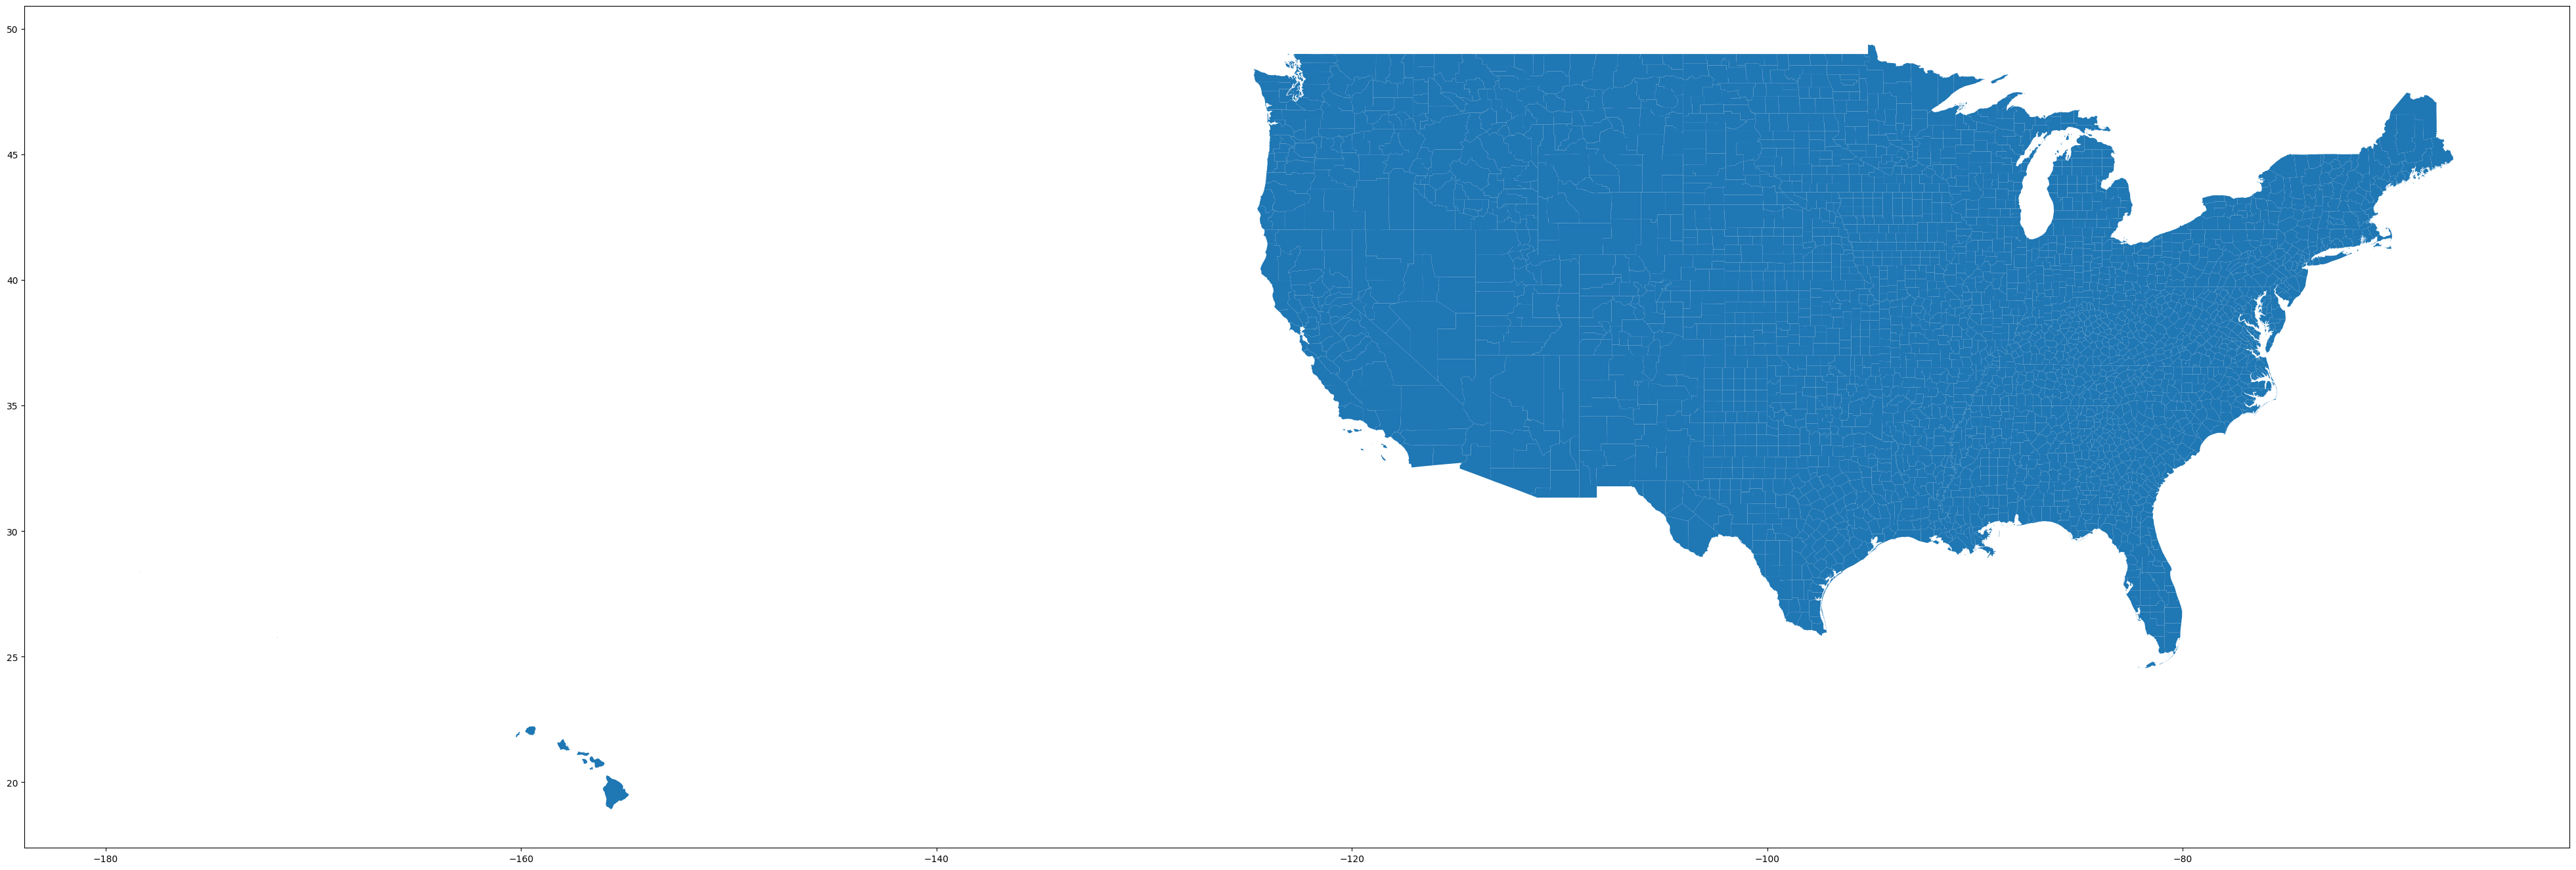

In [ ]:
county.plot( figsize=(50,50))

Code that did not work below:

In [ ]:
grouped = ckd.groupby(ckd.State)
ckd_AL = grouped.get_group("Alabama")
ckd_AL

Main Value      County    State
0        22.35     AUTAUGA  Alabama
1        21.21     BALDWIN  Alabama
2        23.53     BARBOUR  Alabama
3        37.21        BIBB  Alabama
4        31.03      BLOUNT  Alabama
..         ...         ...      ...
62       26.54  TUSCALOOSA  Alabama
63       39.74      WALKER  Alabama
64       24.10  WASHINGTON  Alabama
65       26.42      WILCOX  Alabama
66       21.99     WINSTON  Alabama

[67 rows x 3 columns]

In [ ]:
df_1 = ckd.iloc[:1000,:]
df_2 = ckd.iloc[1000:2000,:]
df_3 = ckd.iloc[2000:,:]
print("Shape of new dataframes - {} , {}, {}".format(df_1.shape, df_2.shape, df_3.shape))

Shape of new dataframes - (1000, 3) , (1000, 3), (1123, 3)


In [ ]:
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import Nominatim
   
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_1["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_1["Longitude"] = longitude
df_1["Latitude"] = latitude
  
df_1

<ipython-input-153-e97aa2cf7524>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Longitude"] = longitude
<ipython-input-153-e97aa2cf7524>:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1["Latitude"] = latitude


Main Value    County     State  Longitude   Latitude
0         22.35   AUTAUGA   Alabama -86.631940  32.516526
1         21.21   BALDWIN   Alabama -83.263322  33.086940
2         23.53   BARBOUR   Alabama -85.403208  31.858931
3         37.21      BIBB   Alabama -83.694562  32.809588
4         31.03    BLOUNT   Alabama -86.570200  33.951017
..          ...       ...       ...        ...        ...
995       21.59  CALDWELL  Kentucky -97.595964  29.829897
996       17.16  CALLOWAY  Kentucky -88.271076  36.625794
997       26.59  CAMPBELL  Kentucky -84.371529  38.933980
998       31.03  CARLISLE  Kentucky  -2.936231  54.894848
999       31.11   CARROLL  Kentucky -89.955679  42.064735

[1000 rows x 5 columns]

In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_2["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_2["Longitude"] = longitude
df_2["Latitude"] = latitude
  
df_2

In [ ]:
# declare an empty list to store
# latitude and longitude of values 
# of city column
longitude = []
latitude = []
   
# function to find the coordinate
# of a given city 
def findGeocode(county):
       
    # try and catch is used to overcome
    # the exception thrown by geolocator
    # using geocodertimedout  
    try:
          
        # Specify the user_agent as your
        # app name it should not be none
        geolocator = Nominatim(user_agent="your_app_name")
          
        return geolocator.geocode(county)
      
    except GeocoderTimedOut:
          
        return findGeocode(county)    
  
# each value from city column
# will be fetched and sent to
# function find_geocode   
for i in (df_3["County"]):
      
    if findGeocode(i) != None:
           
        loc = findGeocode(i)
          
        # coordinates returned from 
        # function is stored into
        # two separate list
        latitude.append(loc.latitude)
        longitude.append(loc.longitude)
       
    # if coordinate for a city not
    # found, insert "NaN" indicating 
    # missing value 
    else:
        latitude.append(np.nan)
        longitude.append(np.nan)

#Showing the output produced as dataframe.

# now add this column to dataframe
df_3["Longitude"] = longitude
df_3["Latitude"] = latitude
  
df_3

In [ ]:
frames = [df_1, df_2, df_3]
newckd = pd.concat(frames)

In [ ]:
newckd.to_csv('ckd_prevalence_us.csv')